#### Μέλη ομάδας:
* Ηλίας Δημητρακάκης sdi2000046
* Βίκτωρ Λαμπρόπουλος sdi1900096
* Άγγελος Καλογρίδης sdi2000062



# Οδηγίες για να περαστούν τα csv.
1. https://drive.google.com/drive/folders/1-EejCaL215EZoEIAhw4tN5jFr1WiViq2
2. Επιλογή όλων
3. Περισσότερες Ενέργειες > Οργάνωση > Προσθήκη Συντόμευσης
4. Αποθήκευση στο Όλες οι Τοποθεσίες (πάνω δεξιά) To Drive μου > TEDE


In [3]:
# installs are separated from imports because we have to downgrade some libraries

!pip install scipy==1.10.1 gensim==4.3.2 numpy xarray-einstats
!pip install -q spacy datasets transformers scikit-learn
!python -m spacy download en_core_web_sm
!pip install kneed
!pip install numpy
!pip install pandas 
!pip install matplotlib
!pip install nltk
!pip install seaborn
!pip install torch psutil gputil tabulate

Defaulting to user installation because normal site-packages is not writeable
/bin/bash: line 1: python: command not found
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### ❗❗ **IMPORTANT: YOU MUST RESTART THE SESSION TO EXECUTE THE REST OF THE CELLS** ❗❗



*   Click on the down arrow next to Run All
*   Click Restart Session

#### helpers and misc for all upcoming cells  

In [1]:
# Imports
import os
import re
import html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import gensim.downloader as api
import scipy
import gensim

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from kneed import KneeLocator
from sklearn.model_selection import train_test_split, cross_validate,StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.sparse import hstack
from transformers import AutoTokenizer, AutoConfig, AutoModelForSequenceClassification, pipeline
from datasets import load_dataset, Features, Value, Sequence
import torch
from tqdm import tqdm
import os
import time
import json
import gc
from tabulate import tabulate
from IPython.display import display, Markdown
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

# from google.colab import drive

# Mount Google Drive and setup save path
# drive.mount('/content/drive')
save_path = "ds/"
os.makedirs(save_path, exist_ok=True)

# NLTK downloads (quiet mode)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('punkt_tab', quiet=True)

# Print versions to confirm everything loaded correctly

print("NumPy version:", np.__version__)
print("SciPy version:", scipy.__version__)
print("Gensim version:", gensim.__version__)

# Initialize variables and objects for text processing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
label_encoder = LabelEncoder()

# Text preprocessing function (used for tasks)
def preprocess_text(text):

    if pd.isnull(text) or not isinstance(text, str):
        return ""
    text = html.unescape(text)
    text = re.sub(r'<[^>]+>', ' ', text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.isalpha()]
    return " ".join(tokens)

# # Helper function to read CSV from save_path
def read_csv(filename):
    return pd.read_csv(os.path.join(save_path, filename), low_memory=False)

# Dataset URLs
beauty="https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/meta_categories/meta_All_Beauty.jsonl"
beauty_reviews="https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/review_categories/All_Beauty.jsonl"

software="https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/meta_categories/meta_Software.jsonl"
software_reviews="https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/review_categories/Software.jsonl"

handmade_products="https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/meta_categories/meta_Handmade_Products.jsonl"
handmade_products_reviews="https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/review_categories/meta_Handmade_Products.jsonl"

digital_music="https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/meta_categories/meta_Digital_Music.jsonl"
digital_music_reviews="https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/review_categories/Digital_Music.jsonl"

appliances="https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/meta_categories/meta_Appliances.jsonl"
appliances_reviews="https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/review_categories_categories/meta_Appliances.jsonl"

categories=[
    'All_Beauty',
    'Software',
    'Handmade_Products',
    'Appliances',
    'Digital_Music'
]


/home/zenki/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NumPy version: 1.26.4
SciPy version: 1.10.1
Gensim version: 4.3.2


# Εργασία ΤΕΔΕ part 1
----

## load datasets from the urls to save them locally



#### get datasets with load_dataset and store them to drive as .csv

In [8]:
# from tabulate import tabulate
# from datasets import load_dataset, get_dataset_config_names


review_datasets = {}
meta_datasets = {}
DATA_REPO = 'McAuley-Lab/Amazon-Reviews-2023'
for cat in categories:
  path_review = "raw_review_" + cat
  path_meta = "raw_meta_" + cat
  review_datasets[cat] = load_dataset(DATA_REPO,path_review,streaming=True,trust_remote_code=True)
  meta = {}
  meta = load_dataset(DATA_REPO,path_meta,streaming=True)
  meta_datasets[cat] = meta.remove_columns(['images','videos','author'])

for cat in categories:
  df_rev = pd.DataFrame(review_datasets[cat]['full'])
  #drop review entries that have these core columns empty and save them as files
  df_rev.dropna(subset=["rating","text","title"],inplace=True)
  #drop duplicates based on title
  df_rev.drop_duplicates(subset=['title'], keep='first', inplace=True)
  df_rev.to_csv(save_path + cat +"_reviews.csv", index=False)
  #any of the products with this column set to null are given the value false
  df_rev["verified_purchase"] = df_rev["verified_purchase"].fillna(False)


  df_meta = pd.DataFrame(meta_datasets[cat]['full'])
  #drop meta entries that have these core columns empty and save them as files
  df_meta = df_meta.dropna(subset=["title"])

  df_meta.to_csv(save_path + cat+"_meta.csv", index=False)





KeyboardInterrupt: 

#### read to memory the .csv datasets




In [3]:

#make a dictionary of the result of read_csv with keys as the names of the csv files
csv_list = []
for cat in categories:
  csv_list.append(read_csv(cat+"_reviews.csv"))
  csv_list.append(read_csv(cat+"_meta.csv"))

csv_keys = []
for cat in categories:
  csv_keys.append(cat+"_reviews.csv")
  csv_keys.append(cat+"_meta.csv")

csv_dict = {}
for key, value in zip(csv_keys, csv_list):
  csv_dict[key] = value


## Task1

#### Q1

-------------------------------------------------- Question 1 --------------------------------------------------


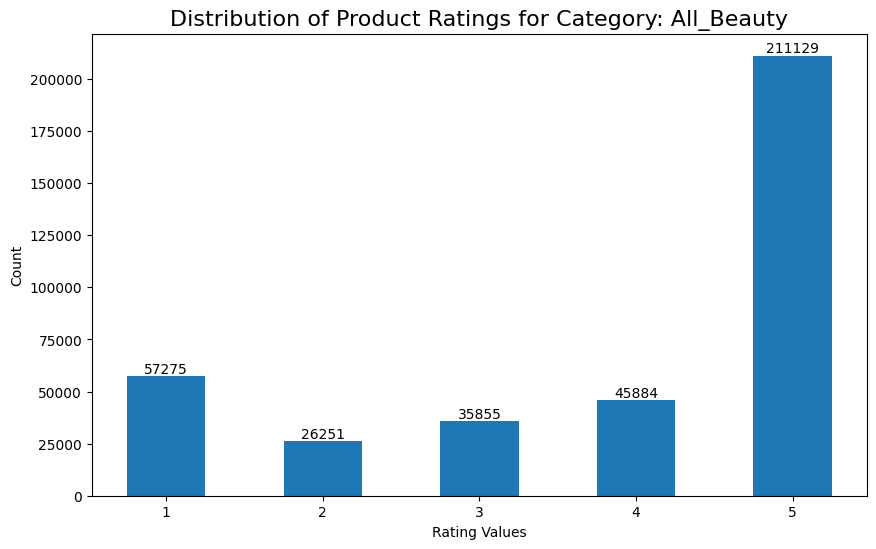

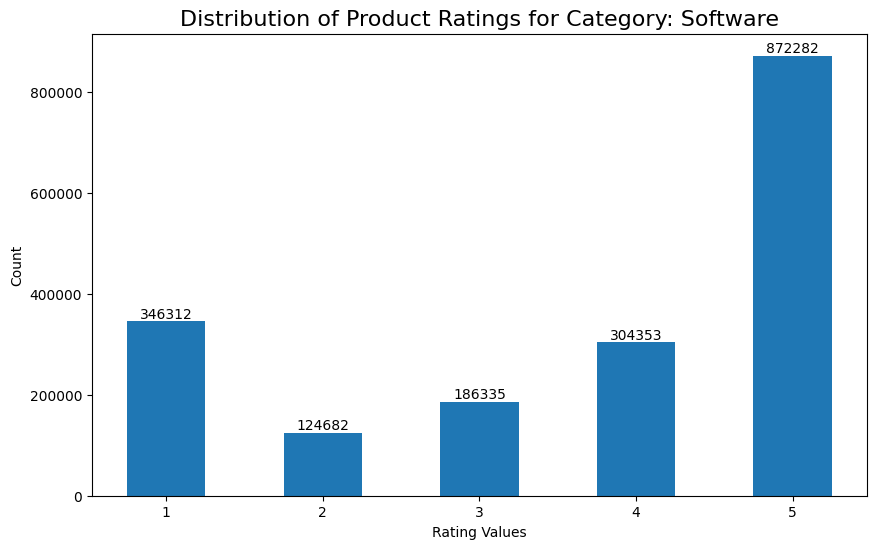

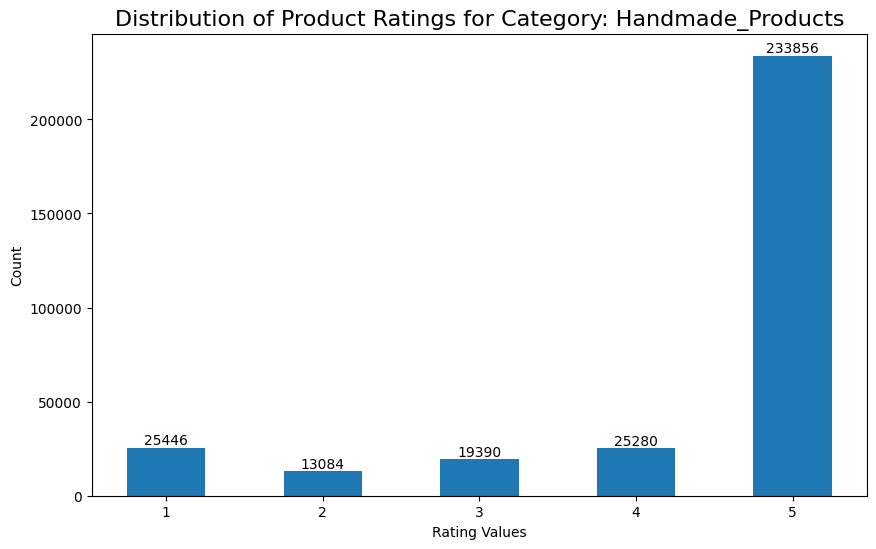

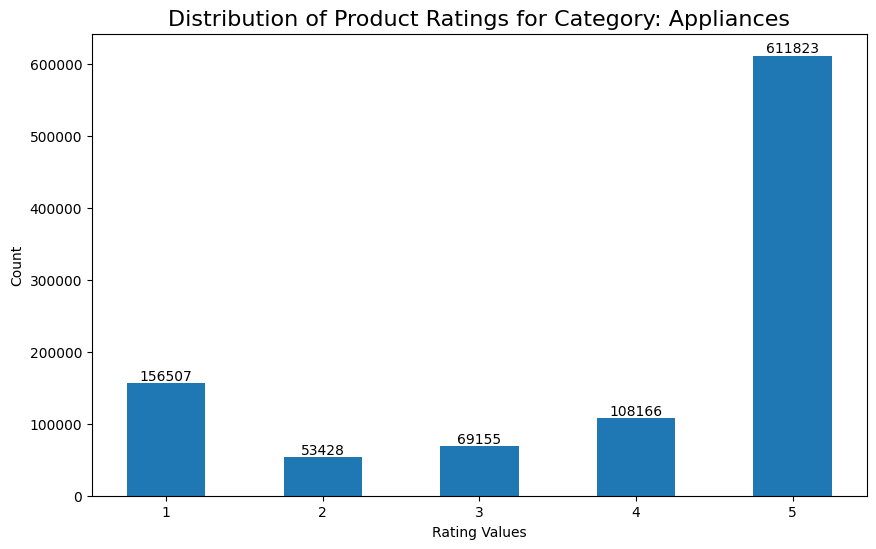

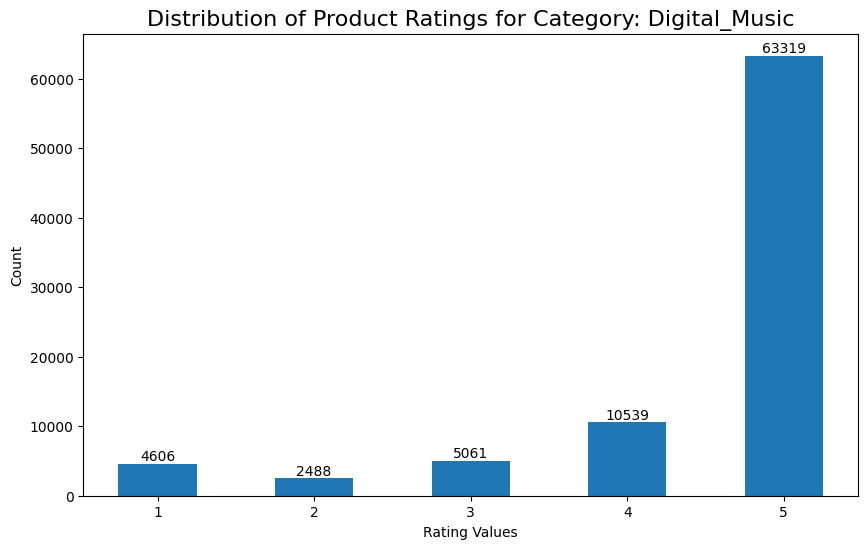

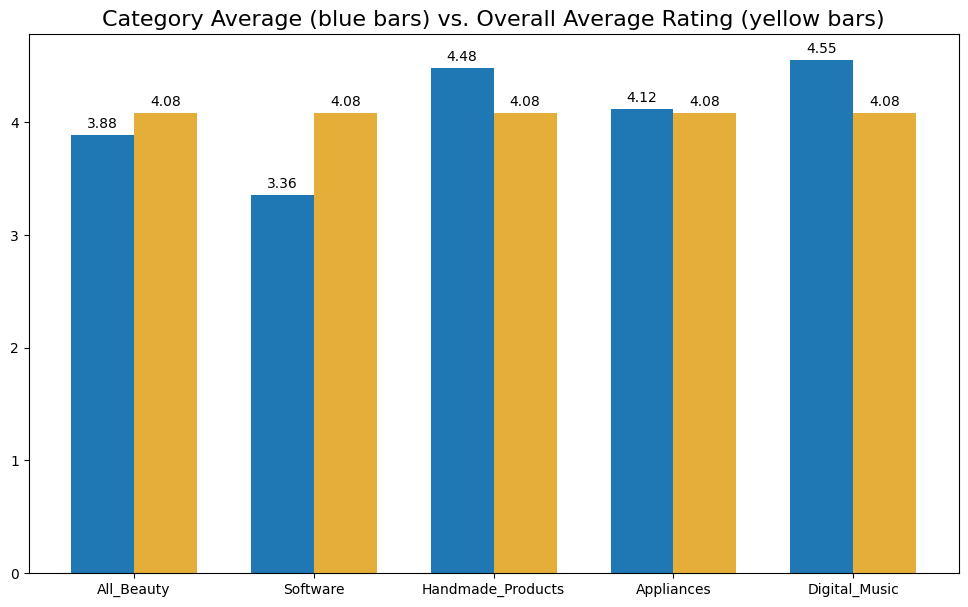

In [9]:
#print bars of each category's average next to the total average, part of Q1
def print_average_chart(categories,avgs=[]):
    num_categories = len(categories)
    category_averages = avgs[:-1]
    total_average = avgs[-1]
    x_indices = np.arange(num_categories)
    bar_width = 0.35 #each bar's width
    positions1 = x_indices-bar_width/2
    positions2 = x_indices+bar_width/2
    total_average_repeated = [total_average] * num_categories
    fig, ax = plt.subplots(figsize=(12, 7))
    rects1 = ax.bar(positions1, category_averages, bar_width, label='Category Average')
    rects2 = ax.bar(positions2, total_average_repeated, bar_width, label=f'Overall Average ({total_average:.2f})', color='#e5ae38')

    ax.set_title('Category Average (blue bars) vs. Overall Average Rating (yellow bars)', fontsize=16)
    ax.set_xticks(x_indices)
    ax.set_xticklabels(categories)

    #labels on top of bars
    ax.bar_label(rects1, padding=3, fmt='%.2f')
    ax.bar_label(rects2, padding=3, fmt='%.2f')

    plt.show()
    print("\n\n")


#print distribution of ratings, other part of Q1
def print_rating_distribution(ds,category_name):
  rating_counts = ds['rating'].value_counts().sort_index()

  #plot chart
  fig, ax = plt.subplots(figsize=(10, 6))
  bars = ax.bar(rating_counts.index, rating_counts.values, width=0.5)
  ax.set_title(f'Distribution of Product Ratings for Category: {category_name}', fontsize=16)
  ax.set_xlabel('Rating Values')
  ax.set_ylabel('Count')
  ax.bar_label(bars)

  plt.show()
  print("\n")


############################### Question 1 ########################################
print("-"*50 + " Question 1 " + "-"*50)
for cat in categories:
  print_rating_distribution(csv_dict[f"{cat}_reviews.csv"],cat)


print("\n\n")


#get average of each category and add them to a list
averages=[]
for cat in categories:
  averages.append(csv_dict[f"{cat}_meta.csv"]["average_rating"].mean())


#total average of all categories
total_avg=0.0
for avg in averages:
  total_avg+=avg
total_avg/=5
averages.append(total_avg)
print_average_chart(categories,averages)


#### Q2

In [9]:

def common_phrases(ds, review_ds, name):
  REVIEWS_THRESHOLD = 100 #should have more than this many reviews
  RATING_THRESHOLD = 2.1 #should have an average rating lower than this
  filtered_ds = ds[(ds['rating_number'] >= REVIEWS_THRESHOLD) & (ds['average_rating'] <= RATING_THRESHOLD)]
  if filtered_ds.empty:
    print(f"No products in category: {name} found with more reviews than {REVIEWS_THRESHOLD} and lower average rating than {RATING_THRESHOLD}!")
    return

  for _, row in filtered_ds.iterrows():
    parent_asin = row['parent_asin']
    product_title = row.get('title')
    product_reviews = review_ds[review_ds['parent_asin'] == parent_asin]['text'].dropna()
    if product_reviews.empty:
      print(f"No reviews found for product with ASIN: {parent_asin} and title: {product_title} to extract keywords.")
      continue
    cleaned_reviews = product_reviews.apply(preprocess_text)
    vectorizer = CountVectorizer(stop_words="english", max_features=15)
    X = vectorizer.fit_transform(cleaned_reviews)
    word_counts = X.toarray().sum(axis=0)
    keywords = pd.Series(word_counts, index=vectorizer.get_feature_names_out()).sort_values(ascending=False)

    md = f"**ASIN:** `{parent_asin}`  \n**Title:** {product_title}  \n**Number of Reviews:** {row['rating_number']}  \n**Average Rating:** {row['average_rating']:.2f}  \n**Top Keywords:**\n"
    for k, v in keywords.items():
      md += f"- **{k}**: {v}\n"
    display(Markdown(md))

print("-"*50 + " Question 2 " + "-"*50)
for cat in categories:
  display(Markdown(f"\n# For Category: {cat}\n"))
  common_phrases(csv_dict[f"{cat}_meta.csv"], csv_dict[f"{cat}_reviews.csv"], cat)
  print("\n\n")


-------------------------------------------------- Question 2 --------------------------------------------------



# For Category: All_Beauty


**ASIN:** `B0922K76XW`  
**Title:** Heatless Hair Curlers For Long Hair To Sleep In Overnight,No Heat Silk Curls Headband, Soft Foam Hair Rollers, Curling Ribbon and Flexi Rods for Natural Hair (Yellow)  
**Number of Reviews:** 102  
**Average Rating:** 2.10  
**Top Keywords:**
- **hair**: 7
- **waste**: 3
- **way**: 3
- **clip**: 2
- **hold**: 2
- **quality**: 2
- **stay**: 2
- **stiff**: 2
- **add**: 1
- **really**: 1
- **reccomend**: 1
- **resource**: 1
- **returned**: 1
- **save**: 1
- **saw**: 1


**ASIN:** `B08R6BSWSH`  
**Title:** Matte Transparent_Mask,Clarity Face_Masks Smile Mouth Shield for Adult, All Clear Face Breathable Washable Comfortable, Visible Expression for Men Women (5PC)  
**Number of Reviews:** 153  
**Average Rating:** 2.10  
**Top Keywords:**
- **mask**: 12
- **plastic**: 10
- **like**: 5
- **bag**: 4
- **fog**: 4
- **mouth**: 4
- **breathe**: 3
- **clear**: 3
- **face**: 3
- **hearing**: 3
- **impaired**: 3
- **make**: 3
- **product**: 2
- **read**: 2
- **suffocate**: 2


**ASIN:** `B0C5TMMRBQ`  
**Title:** Koxuky 2023 New Gold Concentrated Perfume Oil, Pheromones Perfumes for Women, Long Lasting Arabian Perfumes Retro Perfume Essential Oil for Women (Golden 12 ML)  
**Number of Reviews:** 117  
**Average Rating:** 1.90  
**Top Keywords:**
- **smell**: 3
- **bottle**: 2
- **scent**: 2
- **applying**: 1
- **little**: 1
- **maybe**: 1
- **meet**: 1
- **min**: 1
- **money**: 1
- **noticeable**: 1
- **peach**: 1
- **presentation**: 1
- **return**: 1
- **sadly**: 1
- **star**: 1


No reviews found for product with ASIN: B0CBBZ9MJ4 and title: Wig to extract keywords.






# For Category: Software


**ASIN:** `B00H53RBTS`  
**Title:** LightInTheBox - My World Store  
**Number of Reviews:** 267.0  
**Average Rating:** 1.70  
**Top Keywords:**
- **return**: 118
- **dress**: 86
- **item**: 73
- **size**: 61
- **order**: 59
- **refund**: 56
- **like**: 48
- **company**: 46
- **quality**: 45
- **ordered**: 43
- **money**: 42
- **shipping**: 39
- **fit**: 38
- **cost**: 35
- **shirt**: 33


**ASIN:** `B00B63FX34`  
**Title:** [OLD VERSION] Office Professional 2013 Key Card 1PC/1User  
**Number of Reviews:** 289.0  
**Average Rating:** 2.10  
**Top Keywords:**
- **office**: 281
- **microsoft**: 133
- **product**: 109
- **version**: 96
- **new**: 93
- **software**: 90
- **use**: 71
- **key**: 68
- **computer**: 65
- **program**: 56
- **word**: 55
- **need**: 49
- **time**: 48
- **work**: 48
- **user**: 47


**ASIN:** `B01J3I06Y4`  
**Title:** Strip Video poker Kayden  
**Number of Reviews:** 123.0  
**Average Rating:** 1.90  
**Top Keywords:**
- **able**: 1
- **access**: 1
- **app**: 1
- **control**: 1
- **download**: 1
- **effect**: 1
- **kid**: 1
- **old**: 1
- **tho**: 1
- **upset**: 1


**ASIN:** `B07JZ4RNK5`  
**Title:** Sex Touch Free  
**Number of Reviews:** 248.0  
**Average Rating:** 1.90  
**Top Keywords:**
- **accessible**: 1
- **amazon**: 1
- **expect**: 1
- **freetime**: 1
- **garbage**: 1
- **wind**: 1


**ASIN:** `B017HQWPIE`  
**Title:** My Virtual Gay Boyfriend Free  
**Number of Reviews:** 172.0  
**Average Rating:** 2.00  
**Top Keywords:**
- **stupid**: 1
- **time**: 1
- **waste**: 1


No reviews found for product with ASIN: B015IIM9NE and title: Are You Sexy? to extract keywords.


**ASIN:** `B00OAJ352W`  
**Title:** Banner Saga - Viking Strategy Tactics RPG - Best Indie Game of 2014  
**Number of Reviews:** 213.0  
**Average Rating:** 1.90  
**Top Keywords:**
- **game**: 110
- **time**: 25
- **like**: 23
- **story**: 22
- **work**: 21
- **play**: 20
- **great**: 19
- **app**: 17
- **update**: 16
- **good**: 15
- **download**: 14
- **screen**: 14
- **issue**: 12
- **make**: 12
- **playing**: 12



# For Category: Handmade_Products


No products in category: Handmade_Products found with more reviews than 100 and lower average rating than 2.1!






# For Category: Appliances


**ASIN:** `B002LSO9WE`  
**Title:** Maytag Bravos Series MVWB850WL 28 5 cu. Ft. Top-Loader Washer - Lunar Silver  
**Number of Reviews:** 100  
**Average Rating:** 1.90  
**Top Keywords:**
- **washer**: 187
- **water**: 180
- **clothes**: 153
- **machine**: 149
- **load**: 80
- **maytag**: 77
- **cycle**: 73
- **clean**: 63
- **year**: 63
- **time**: 60
- **wash**: 60
- **use**: 53
- **washing**: 52
- **level**: 45
- **like**: 41



# For Category: Digital_Music


No products in category: Digital_Music found with more reviews than 100 and lower average rating than 2.1!





#### Q3

In [27]:

#for Q3, thelei ta TOP 5 apo oles tis katigories, oxi top 5 gia KATHE katigoria
def find_top5(ds=[]):
    # Get top 5 from each dataset
    top_lists = [df.nlargest(5, 'rating_number') for df in ds]

    # Concatenate all top 5s
    combined_top = pd.concat(top_lists, ignore_index=True)
    # Set pandas display options to show full column content
    pd.set_option('display.max_colwidth', None)
    # Get the overall top 5
    top5 = combined_top.nlargest(5, 'rating_number')
    # Display as markdown with features as bullet points
    md = ""
    for idx, row in top5.iterrows():
        md += f"## {row['title']}\n"
        md += f"- **Review count:** {row['rating_number']}\n"
        md += f"- **Features:**\n"
        #features may be a string representation of a list, so eval safely
        features = row['features']
        if isinstance(features, str):
            try:
                features_list = eval(features)
                if not isinstance(features_list, list):
                    features_list = [features]
            except Exception:
                features_list = [features]
        elif isinstance(features, list):
            features_list = features
        else:
            features_list = [str(features)]
        for feat in features_list:
            md += f"  - {feat}\n"
        md += "\n\n"
    display(Markdown(md))

################################ Question 3 ########################################
# print("\n" + "-"*50 + " Question 3 " + "-"*50 )

find_top5([csv_dict[f"{cat}_meta.csv"] for cat in categories])


## YouTube
- **Review count:** 1898759.0
- **Features:**
  - Browse by interest - Discover videos you’ll love in categories like music, entertainment, news, gaming, and more. All from the comfort of your couch.
  - Supports multiple accounts - Everyone at home can sign into YouTube with a Google account to see recommendations, subscriptions, and playlists.
  - Play YouTube videos from your phone on the TV - It’s easy to enjoy videos with friends and family. Simply find the videos you want to watch on your phone, then send them to your TV with a single tap.
  - Search by voice - Quickly and easily find what you want to watch using voice search.
  - Watch movies and shows - Stay entertained with thousands of movies and TV episodes available to own, rent, or watch for free.
  - Enjoy music on the big screen - Find music videos featuring your favorite artists, songs, live performances and more. Discover new music based on your tastes and what’s trending around you.
  - Watch videos in 4K - YouTube is home to the world’s largest library of online 4K content. Enjoy high-definition videos on the biggest screen in the house – from scenic nature videos to movie and video game trailers and more. (Requires a 4K-capable device.)


## Disney+
- **Review count:** 1011284.0
- **Features:**
  - Exclusive new Originals from Disney, Pixar, Marvel, Star Wars, and National Geographic.
  - Access to new releases, timeless classics, and past seasons of your favorite TV shows.
  - Over 100 titles in 4K UHD and HDR.
  - The ability to watch on four screens at once at no extra cost.
  - Multiple parental control features including Profile PIN and Kid-Proof Exit. Account holders can change an individual profile’s content rating at any time under Profile settings.
  - IMAX Enhanced, see the full scale and scope with IMAX's expanded aspect ratio. Available with certain Marvel and Pixar titles and accessible on all devices where Disney+ is supported.


## Pluto TV - It’s Free TV
- **Review count:** 776283.0
- **Features:**
  - Watch 100+ HD channels with 24/7 free content
  - Free Access to VOD with over 1000 movies and full TV episodes
  - Watch over WiFi, 3G, and 4G networks
  - Fire TV support


## Downloader
- **Review count:** 672812.0
- **Features:**
  - Download files by entering their URL.
  - Built-in Web Browser with support for file downloads.
  - Navigate websites using just a Fire TV Remote or Game Controller. (No mouse/keyboard needed.)
  - Browser features fullscreen mode, zooming, and quick access to favorites/bookmarks.
  - Favorites allow you to easily save and open frequently visited URLs.
  - Open, install (if APK), delete, and manage files within the app.


## Apple TV
- **Review count:** 464483.0
- **Features:**
  - Easily find your already purchased or rented titles in the Library tab. Browse by recently added, genres, and more.
  - Watch new exclusive Apple Originals every month on Apple TV+, like The Morning Show, See, Dickinson, For All Mankind, The Elephant Queen, Helpsters, Ghostwriter, Servant, and more.
  - Access channels that you’ve subscribed to and share them with your family. Channels play in the Apple TV app ad-free, online or off with no additional apps, accounts, or passwords needed.
  - Browse new release movies or explore the catalog of over 100,000 movies and shows, including the largest catalog of 4K HDR movies.
  - Watch Now also includes Up Next, which helps you quickly find and watch your favorites, plus resume what you’re watching from the moment you left off, across all your devices.




#### Q4



-------------------------------------------------- Question 4 --------------------------------------------------




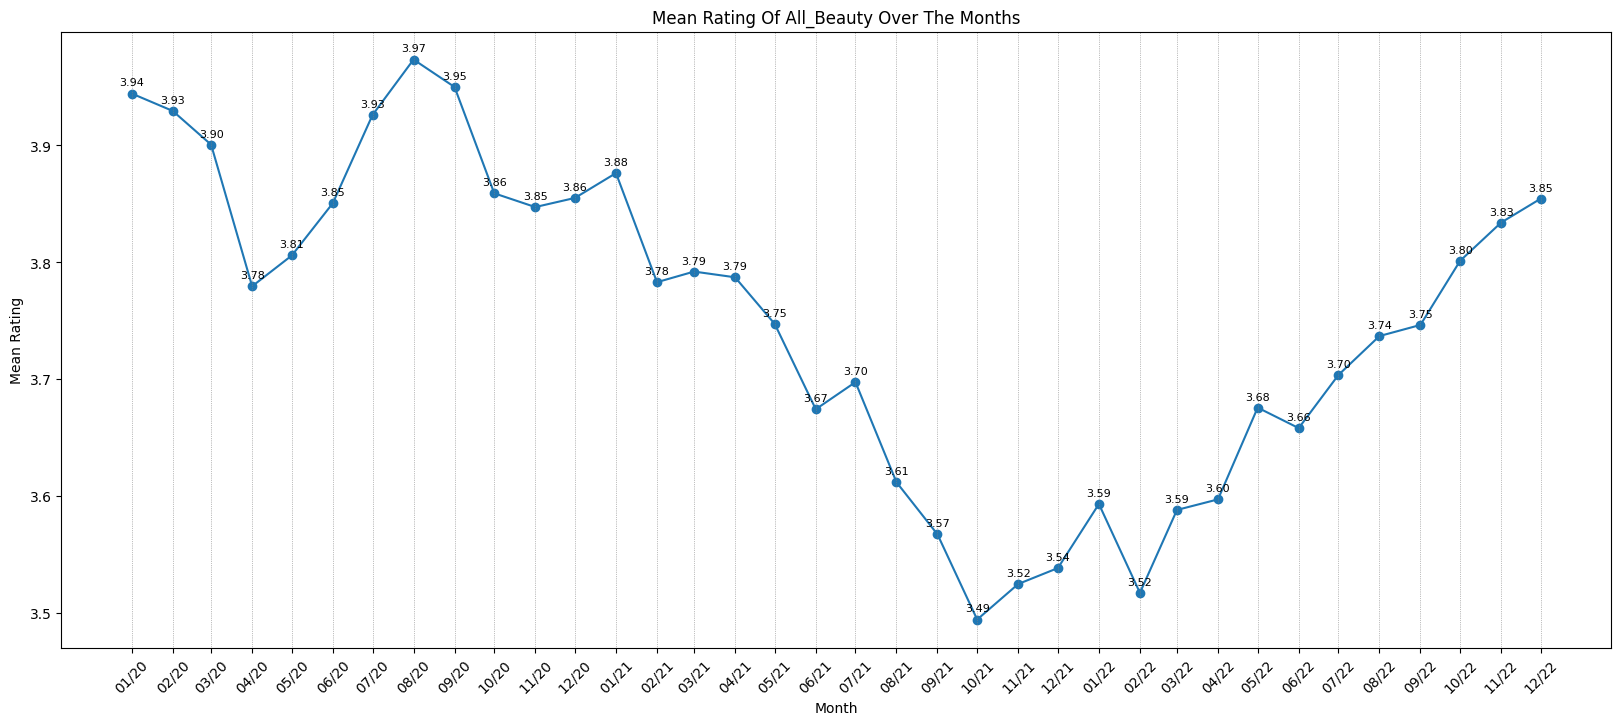

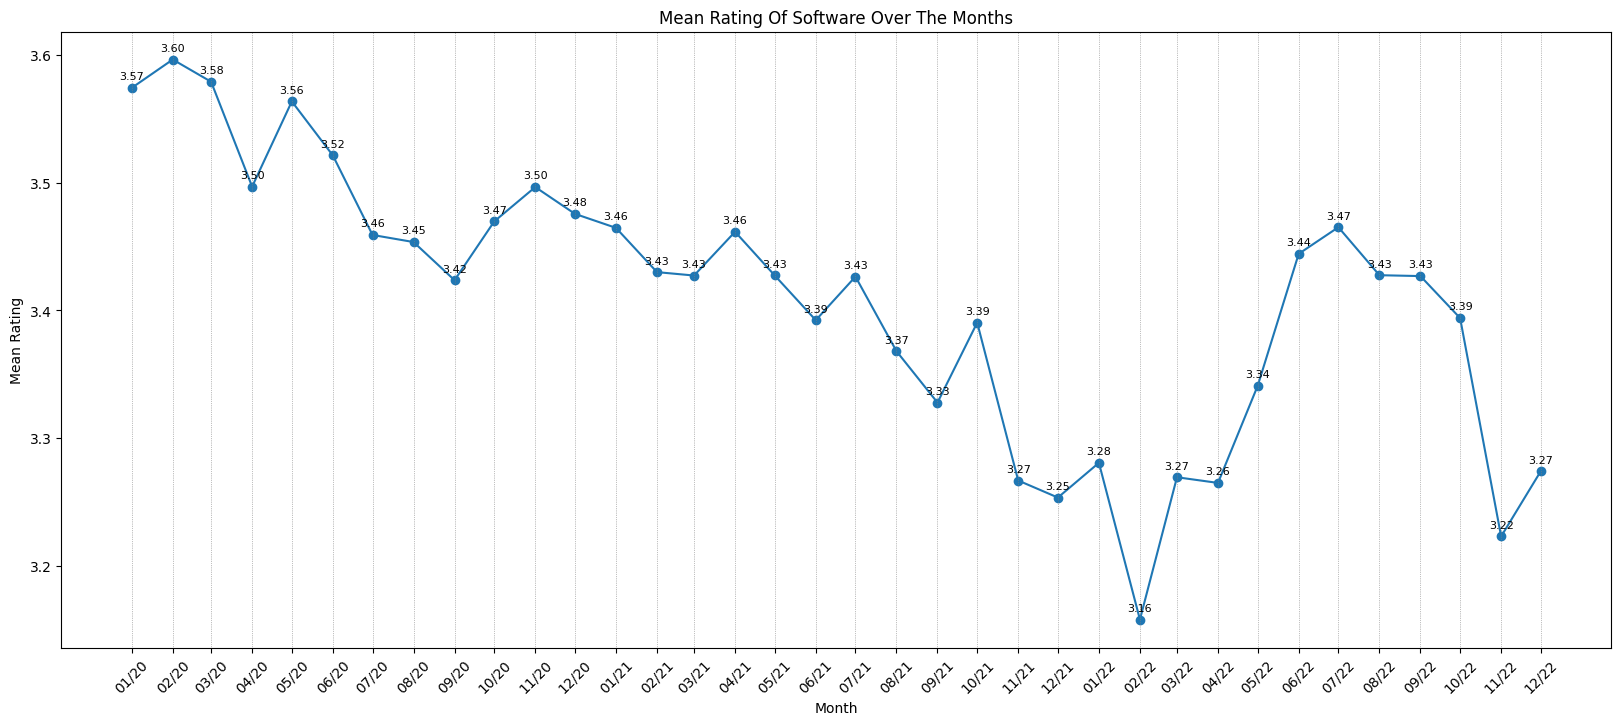

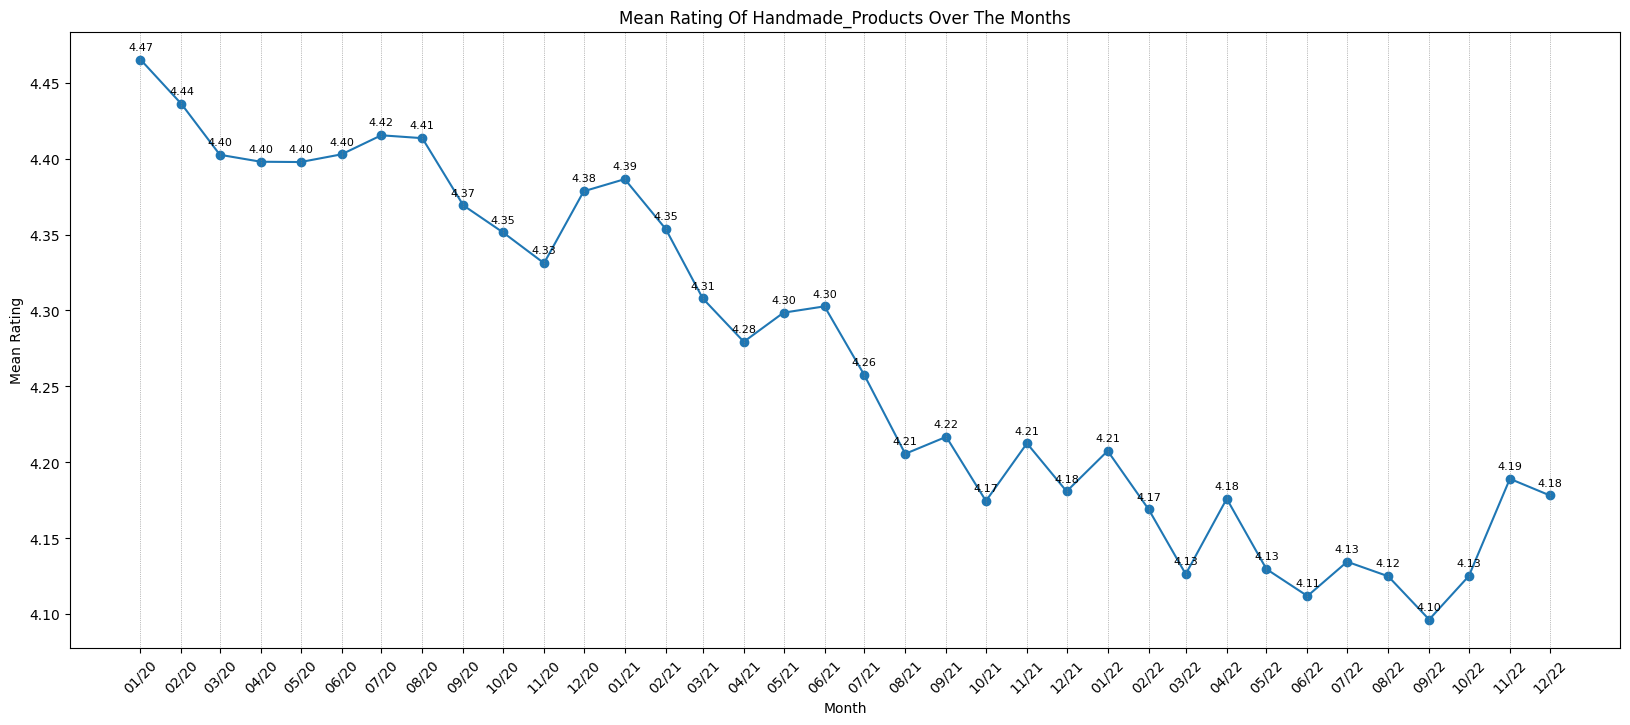

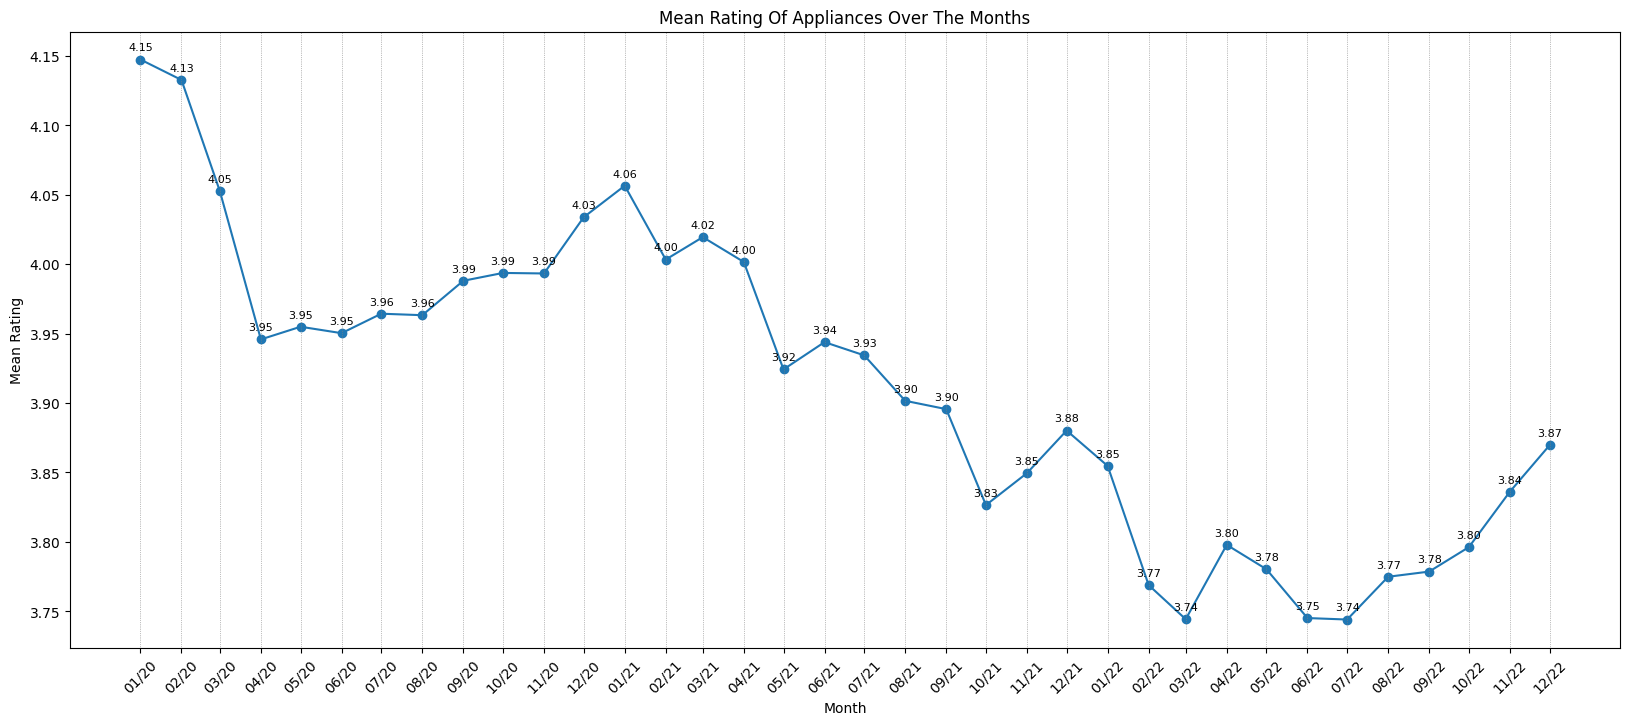

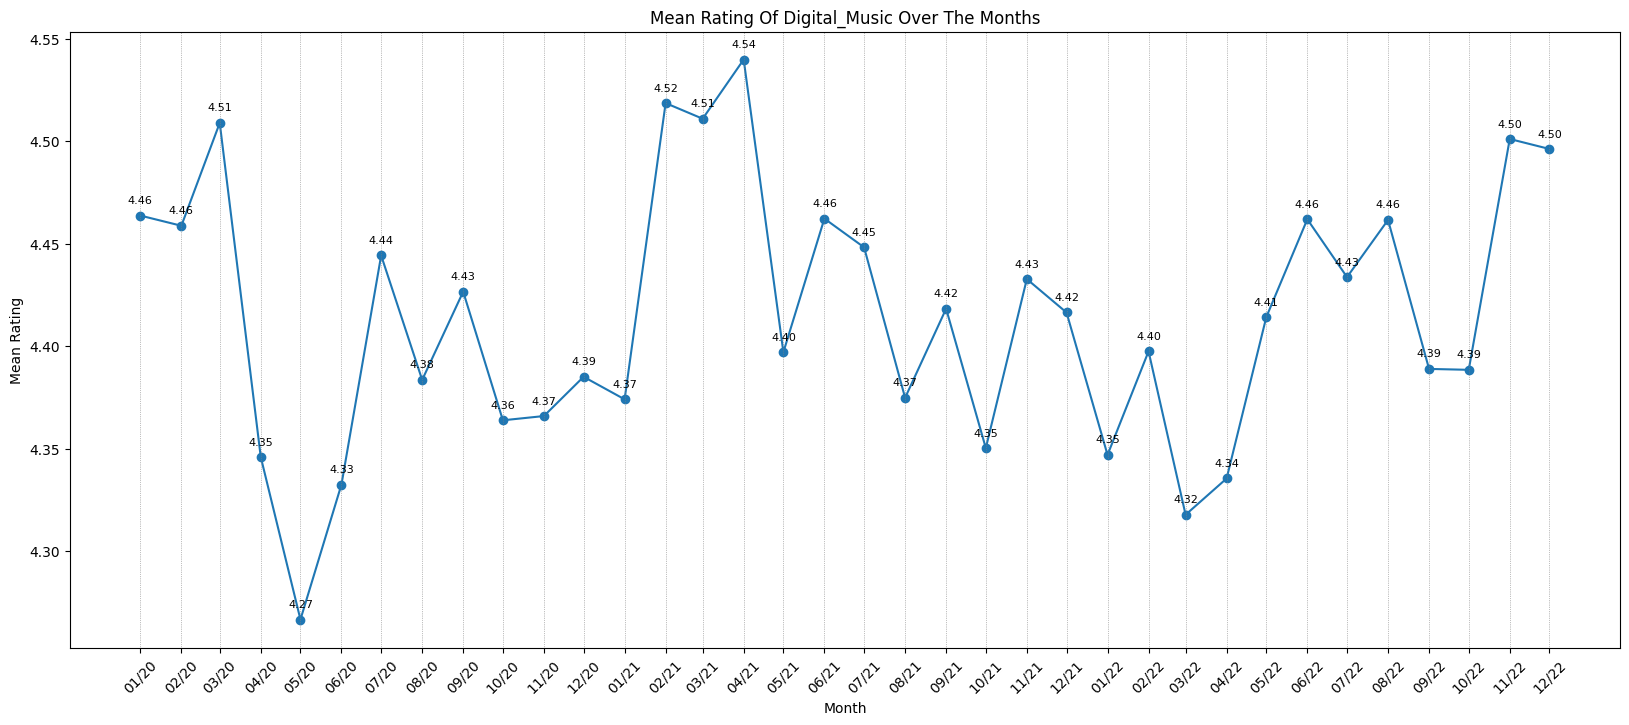

In [22]:
#for Q4
def plot_ratings_over_time(df,name,start,end):
  # print(type(df))
  #convert timestamp to date time
  df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')
  # we are interesting in plotting only average of each month between Jan. 1 2000 and Dec 31 2004
  start_date = pd.Timestamp(start)
  end_date = pd.Timestamp(end)
  filtered_df = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)].copy()
  #group by month
  filtered_df['month'] = filtered_df['datetime'].dt.to_period('M')
  monthly_grouped = filtered_df.groupby('month')
  monthly_means = monthly_grouped['rating'].mean() #average for each month
  # print(monthly_grouped.head(10))
  # print(monthly_medians)
  # Generate full month range between start and end
  full_month_range = pd.period_range(start=start_date, end=end_date, freq='M')

  # Reindex to include all months, even if they don't have data
  monthly_means = monthly_means.reindex(full_month_range)
  #FOR TESTING, to see how plow will be after some NaN values an actual entry to be added!
  # monthly_means[pd.Period('2024-12', freq='M')] = 3.2

  # print(monthly_means)

  #plot mean
  plt.figure(figsize=(20, 8))
  plt.plot(monthly_means.index.to_timestamp(), monthly_means.values, marker='o', linestyle='-')
  plt.title(f'Mean Rating Of {name} Over The Months')
  plt.xlabel('Month')
  plt.ylabel('Mean Rating')
  plt.grid(False)
  #add vertical dotted lines for readability
  for x in monthly_means.index.to_timestamp():
    plt.axvline(x=x, color='gray', linestyle=':', linewidth=0.5)

  #add the value of each dot above it for readability
  for x, y in zip(monthly_means.index.to_timestamp(), monthly_means.values):
    if not pd.isna(y):  # Only label non-NaN points
        plt.text(x, y + 0.005, f'{y:.2f}', ha='center', va='bottom', fontsize=8)


  # Format x-axis labels as mm/yy
  ax = plt.gca()
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))

  # Set x-ticks to every month in the full range
  plt.xticks(monthly_means.index.to_timestamp(), rotation=45)
  plt.show()
  print("\n\n")


################################ Question 4 ########################################
print("\n\n" + "-"*50 + " Question 4 " + "-"*50 + "\n\n")

#give user freedom to pick date period, format is YYYY-MM-DD
start_date="2020-01-01"
end_date="2022-12-31"

for cat in categories:
  plot_ratings_over_time(csv_dict[f"{cat}_reviews.csv"],cat,start_date,end_date)


Από την ανάλυση των διαγραμμάτων, παρατηρείται ένα σαφές εποχικό μοτίβο. Οι μέσες αξιολογήσεις σε κατηγορίες όπως τα Χειροποίητα Προϊόντα και τα Είδη Ομορφιάς τείνουν να αυξάνονται προς το τέλος του έτους (Νοέμβριο-Δεκέμβριο), πιθανότατα λόγω της εορταστικής περιόδου των δώρων. Αντίθετα, συχνά ακολουθεί μια πτώση τους πρώτους μήνες του επόμενου έτους, με πιο έντονο παράδειγμα την κατηγορία του Λογισμικού. Τέλος, κατηγορίες όπως η Ψηφιακή Μουσική δεν δείχνουν τόσο εποχικότητα, αλλά έντονη μεταβλητότητα που φαίνεται να επηρεάζεται περισσότερο από μεμονωμένα γεγονότα, όπως σημαντικές νέες κυκλοφορίες.

## Task 2

In [6]:
# Configuration
device = 0 if torch.cuda.is_available() else -1
# device = -1
MODEL_ID = "DT12the/distilbert-sentiment-analysis"
# save_path = "/content/drive/MyDrive/TEDE/"
CHECKPOINT_FILE = os.path.join(save_path, "sentiment_checkpoint.json")
BATCH_SIZE = 16  # Increased for better GPU utilization
CHUNK_SIZE = 500  # Process 2000 reviews at a time
MAX_ROWS_PER_CATEGORY = 50000  # Max rows to process per category
# Custom label mapping
DT12_LABELS = {
    0: 'POSITIVE',
    1: 'NEGATIVE'
}

# Initialize checkpoint system
def load_checkpoint():
    if os.path.exists(CHECKPOINT_FILE):
        with open(CHECKPOINT_FILE, 'r') as f:
            return json.load(f)
    return {
        "completed_categories": [],
        "current_category": "",
        "processed_chunks": 0,
        "processed_rows": 0,  # Track total processed rows per category
        "total_chunks": 0
    }

def save_checkpoint(state):
    with open(CHECKPOINT_FILE, 'w') as f:
        json.dump(state, f)

def delete_checkpoint():
    if os.path.exists(CHECKPOINT_FILE):
        os.remove(CHECKPOINT_FILE)

# Processing functions
def normalize_rating(rating):
    return (rating - 1) / 4

def calculate_sentiment_score(sentiment_result, normalized_rating, w1=0.35, w2=0.65):
    label = sentiment_result['label'].upper()
    score = sentiment_result['score']

    if label == 'POSITIVE':
        return w1 * score + w2 * normalized_rating
    elif label == 'NEGATIVE':
        return w1 * (1 - score) + w2 * normalized_rating
    else:  # Shouldn't happen with our model
        return w1 * 0.5 + w2 * normalized_rating

# Initialize model pipeline (only once)
print("Loading model...")
tokenizer = AutoTokenizer.from_pretrained(MODEL_ID)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_ID)

# Apply custom labels
model.config.id2label = DT12_LABELS
model.config.label2id = {v: k for k, v in DT12_LABELS.items()}

sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer,
    device=device,
    truncation=True,
    max_length=512
)


for cat in categories:
    print(f"\n{'='*50}")
    print(f"Processing category: {cat}")
    print(f"{'='*50}")

    input_path = os.path.join(save_path, f"{cat}_reviews.csv")
    output_path = os.path.join(save_path, f"{cat}_sentiment_score.csv")

    # Create output file if not exists
    if not os.path.exists(output_path):
        pd.DataFrame(columns=['review_text', 'rating', 'normalized_rating',
                             'model_label', 'model_score', 'final_sentiment_score']
                    ).to_csv(output_path, index=False)

    # Get total rows in file for progress estimation
    if not os.path.exists(input_path):
        print(f"Input file not found: {input_path}")
        continue

    # Initialize row counter for this category
    # processed_rows = checkpoint.get('processed_rows', 0)
    processed_rows = 0

    # # Update checkpoint state
    # checkpoint.update({
    #     "current_category": cat,
    #     "processed_rows": processed_rows
    # })
    # save_checkpoint(checkpoint)

    # Create progress bar (row-based)
    pbar = tqdm(total=MAX_ROWS_PER_CATEGORY, initial=processed_rows,
                desc=f"Processing {cat}", unit='row')

    # Process chunks
    reader = pd.read_csv(input_path, chunksize=CHUNK_SIZE)

    for chunk_idx, chunk in enumerate(reader):
        try:
            chunk_start = time.time()

            # Check if we've reached row limit
            if processed_rows >= MAX_ROWS_PER_CATEGORY:
                print(f"\nReached {MAX_ROWS_PER_CATEGORY} rows for {cat}. Stopping processing.")
                break

            # Preprocess chunk - FIXED: Use .loc for assignment to avoid warnings
            # First create a clean copy of the chunk we're going to work with
            chunk = chunk.copy()

            # Now safely modify using .loc
            chunk.loc[:, 'text'] = chunk['text'].astype(str)
            chunk = chunk.dropna(subset=['text', 'rating'])

            if chunk.empty:
                print(f"Skipping empty chunk {chunk_idx}")
                pbar.update(0)
                continue

            # Calculate remaining capacity
            remaining = MAX_ROWS_PER_CATEGORY - processed_rows
            if len(chunk) > remaining:
                chunk = chunk.head(remaining)

            # Process sentiment in batches
            texts = chunk['text'].tolist()
            sentiment_results = sentiment_pipeline(texts, batch_size=BATCH_SIZE)

            # Calculate scores
            result_data = []
            for i, row in enumerate(chunk.itertuples()):
                norm_rating = normalize_rating(row.rating)
                result_data.append({
                    'review_text': row.text,
                    'rating': row.rating,
                    'normalized_rating': norm_rating,
                    'model_label': sentiment_results[i]['label'],
                    'model_score': sentiment_results[i]['score'],
                    'final_sentiment_score': calculate_sentiment_score(
                        sentiment_results[i],
                        norm_rating
                    )
                })

            # Append results to output file
            pd.DataFrame(result_data).to_csv(output_path, mode='a', header=False, index=False)

            # Update row counter
            processed_this_chunk = len(chunk)
            processed_rows += processed_this_chunk

            # Update checkpoint
            chunk_idx += 1

            # Update progress bar
            pbar.update(processed_this_chunk)

            # Print performance
            chunk_time = time.time() - chunk_start
            reviews_sec = processed_this_chunk / chunk_time
            pbar.set_postfix({
                "speed": f"{reviews_sec:.1f} rev/s",
                "last_chunk": f"{chunk_time:.1f}s",
                "total_rows": processed_rows
            })

        except Exception as e:
            print(f"\nError processing chunk {chunk_idx}: {str(e)}")
            print("Saving progress... You can resume later.")
            pbar.close()
            raise  # Re-raise exception to see full trace

        # Clean up memory
        del chunk, texts, sentiment_results, result_data
        gc.collect()
        # torch.cuda.empty_cache()
    pbar.close()
    print(f"\nCompleted {cat} with {processed_rows} rows processed")
    del reader
    gc.collect()

Loading model...


Device set to use cpu



Processing category: All_Beauty


Processing All_Beauty: 100%|██████████| 50000/50000 [29:44<00:00, 28.02row/s, speed=24.8 rev/s, last_chunk=20.2s, total_rows=5e+4] 



Reached 50000 rows for All_Beauty. Stopping processing.

Completed All_Beauty with 50000 rows processed

Processing category: Software


Processing Software: 100%|██████████| 50000/50000 [28:38<00:00, 29.09row/s, speed=39.9 rev/s, last_chunk=12.5s, total_rows=5e+4] 



Reached 50000 rows for Software. Stopping processing.

Completed Software with 50000 rows processed

Processing category: Handmade_Products


Processing Handmade_Products: 100%|██████████| 50000/50000 [18:38<00:00, 44.70row/s, speed=64.7 rev/s, last_chunk=7.7s, total_rows=5e+4]  



Reached 50000 rows for Handmade_Products. Stopping processing.

Completed Handmade_Products with 50000 rows processed

Processing category: Appliances


Processing Appliances: 100%|██████████| 50000/50000 [31:51<00:00, 26.16row/s, speed=29.5 rev/s, last_chunk=17.0s, total_rows=5e+4] 



Reached 50000 rows for Appliances. Stopping processing.

Completed Appliances with 50000 rows processed

Processing category: Digital_Music


Processing Digital_Music: 100%|██████████| 50000/50000 [44:08<00:00, 18.88row/s, speed=16.9 rev/s, last_chunk=29.5s, total_rows=5e+4] 


Reached 50000 rows for Digital_Music. Stopping processing.

Completed Digital_Music with 50000 rows processed


#### Weighted Combination of Text Sentiment and Rating

In [18]:

# Configure device
device = 0 if torch.cuda.is_available() else -1
# MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
MODEL = "DT12the/distilbert-sentiment-analysis"
# save_path = "/content/drive/MyDrive/TEDE/"
# Initialize pipeline once (reuse across categories)
# Load model and tokenizer separately to customize labels
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSequenceClassification.from_pretrained(model_id)
DT12_LABELS = {
    0:'POSITIVE',
    1:'NEGATIVE'
}
# Apply custom labels
model.config.id2label = DT12_LABELS
model.config.label2id = {v: k for k, v in DT12_LABELS.items()}

sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer,
    device=device,
    truncation=True,
    max_length=512
)
# sentiment_pipeline = pipeline(
#     "sentiment-analysis",
#     model=MODEL,
#     device=device,
#     truncation=True,
#     max_length=512
# )

# Define processing functions
def normalize_rating(rating):
    return (rating - 1) / 4

def calculate_sentiment_score(sentiment_result, normalized_rating, w1=0.35, w2=0.65):
    label = sentiment_result['label'].upper()
    score = sentiment_result['score']

    if label == 'POSITIVE':
        return w1 * score + w2 * normalized_rating
    elif label == 'NEGATIVE':
        return w1 * (1 - score) + w2 * normalized_rating
    else:  # NEUTRAL
        return w1 * 0.5 + w2 * normalized_rating
categories=[
    # 'All_Beauty',
    'Software',
    'Handmade_Products',
    'Appliances',
    'Digital_Music'
]
# Process each category sequentially
for cat in categories:
    print(f"Processing {cat}...")

    # Configure paths
    input_path = f"{cat}_reviews.csv"
    output_path = f"{save_path}{cat}_sentiment_score.csv"

    # Create empty output file with headers
    pd.DataFrame(columns=['review_text', 'rating', 'normalized_rating',
                         'model_label', 'model_score', 'final_sentiment_score']
                ).to_csv(output_path, index=False)

    # Process in chunks
    chunk_size = 2000  # Adjust based on memory
    reader = pd.read_csv(os.path.join(save_path,input_path), chunksize=chunk_size)
    chunk_num = 0;
    for chunk in tqdm(reader, desc=f"Processing {cat}"):
        # Preprocess chunk
        chunk = chunk.dropna(subset=['text', 'rating'])
        chunk['text'] = chunk['text'].astype(str)

        if chunk.empty:
            continue

        # Process sentiment in batches
        texts = chunk['text'].tolist()
        sentiment_results = sentiment_pipeline(texts, batch_size=32)

        # Calculate scores
        # chunk['normalized_rating'] = chunk['rating'].apply(normalize_rating)
        result_data = []
        for i, row in enumerate(chunk.itertuples()):
            norm_rating = normalize_rating(row.rating)
            result_data.append({
                'review_text': row.text,
                'rating': row.rating,
                # 'normalized_rating': row['normalized_rating'],
                'normalized_rating': norm_rating,
                'model_label': sentiment_results[i]['label'],
                'model_score': sentiment_results[i]['score'],
                'final_sentiment_score': calculate_sentiment_score(
                    sentiment_results[i],
                    norm_rating
                )
            })

        # Append results to output file
        pd.DataFrame(result_data).to_csv(output_path, mode='a', header=False, index=False)
        chunk_num += 1
        if chunk_num == 100:
          break

    print(f"Completed {cat}")

ModuleNotFoundError: No module named 'torch'

In [ ]:


def get_normalized_rating(rating_list):
  return [(rating - 1) / 4 for rating in rating_list] #avoid .append() for better perfomance???

def get_final_sentiment_score(normalized_rating, text_sentiment, w1=0.35, w2=0.65):
    final_scores = []
    for i in range(len(text_sentiment)):
        label = text_sentiment[i]['label'].upper()
        score = text_sentiment[i]['score']
        if label == 'POSITIVE':
            sentiment_score = score
        elif label == 'NEGATIVE':
            sentiment_score = 1 - score
        else:  #NEUTRAL
            sentiment_score = 0.5
        final_score = w1 * sentiment_score + w2 * normalized_rating[i]
        final_scores.append(final_score)

    return final_scores


def create_csv(text,rating,normalized_rating,model_result,final_sentiment_score):
  out_ds=pd.DataFrame({
        'review_text': text,
        'rating': rating,
        'normalized_rating': normalized_rating,
        # 'model_score': [result['score'] for result in model_result], #maybe both label and score should be kept
        'model_score': model_result,
        'final_sentiment_score': final_sentiment_score
    })
  return out_ds



# Check if a GPU is available and set the device accordingly
# device=0 means the first GPU, device=-1 means the CPU
device = 0 if torch.cuda.is_available() else -1
#disconnected for gpu ffs
# device=-1
print(f"Using device: {'GPU' if device == 0 else 'CPU'}")

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
# tokenizer = AutoTokenizer.from_pretrained(MODEL)
# config = AutoConfig.from_pretrained(MODEL)
# model = AutoModelForSequenceClassification.from_pretrained(MODEL)
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model=MODEL,
    # tokenizer=tokenizer,
    device=device
)

# entries_num=50

for cat in categories:
  current_df = csv_dict[f"{cat}_reviews.csv"].copy()
  #to be aligned with task3 - part2, we drop any that dont have ratings or text
  current_df.dropna(subset=['text', 'rating'], inplace=True)
  current_df['text'] = current_df['text'].astype(str)
  text_list = current_df["text"].tolist()
  rating_list = current_df['rating'].tolist()

  #get result of model
  model_result= sentiment_pipeline(
      text_list,
      batch_size=32,
      truncation=True,
      max_length=512
  )
  # print(model_result)

  #normalise ratings from the reviews dataset
  normalized_rating=get_normalized_rating(rating_list)

  #calculate final score with weights
  final_sentiment_score=get_final_sentiment_score(normalized_rating,model_result)

  #create a new .csv file to save the columns
  out_ds =create_csv(text_list,rating_list,normalized_rating,model_result,final_sentiment_score)

  #save file
  out_ds.to_csv(f"{save_path+cat}_sentiment_score.csv", index=False)

  display(out_ds.tail(15))






# Εργασία ΤΕΔΕ part 2
--------

## Task 1


Null counts in raw data for relevant columns:
description           0
average_rating        0
price             16864
dtype: int64
Length before description processing: 3136
Length after description processing: 1238


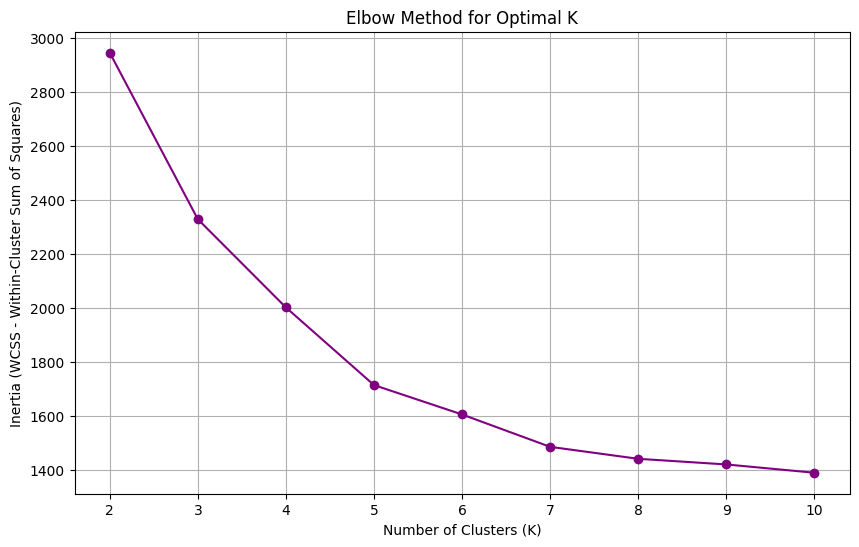

For n_clusters = 4, the average silhouette_score is: 0.3398


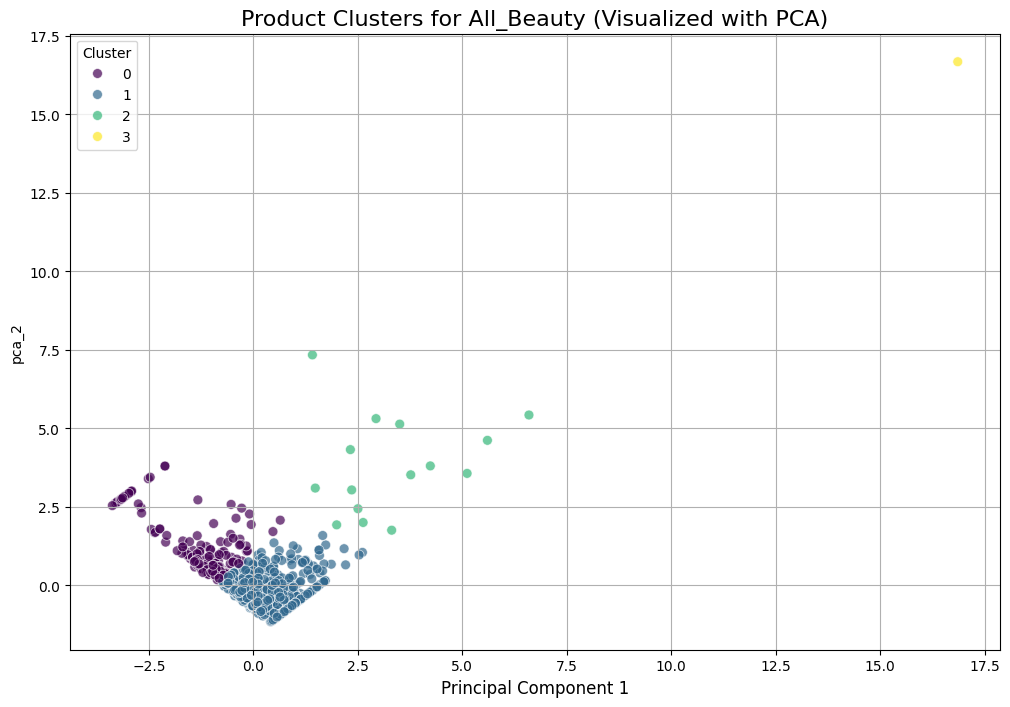


Null counts in raw data for relevant columns:
description          0
average_rating       5
price             4063
dtype: int64
Length before description processing: 15932
Length after description processing: 15828


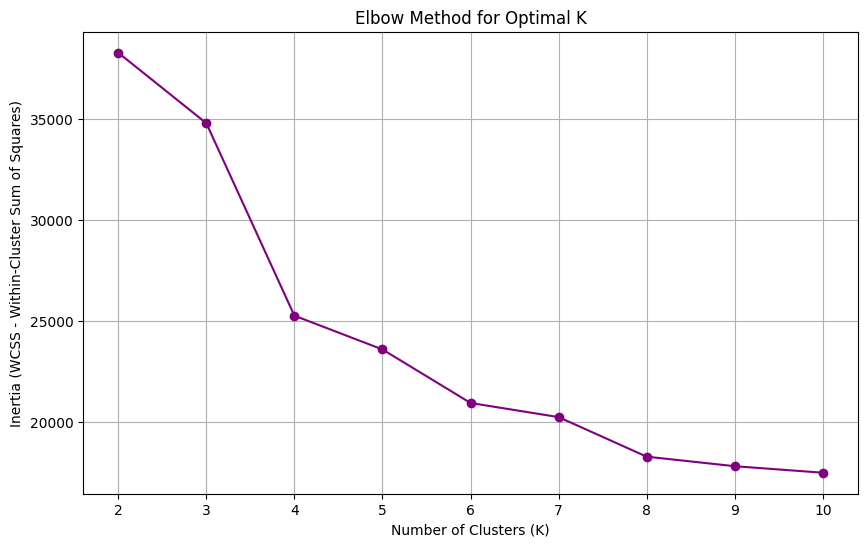

For n_clusters = 2, the average silhouette_score is: 0.2158


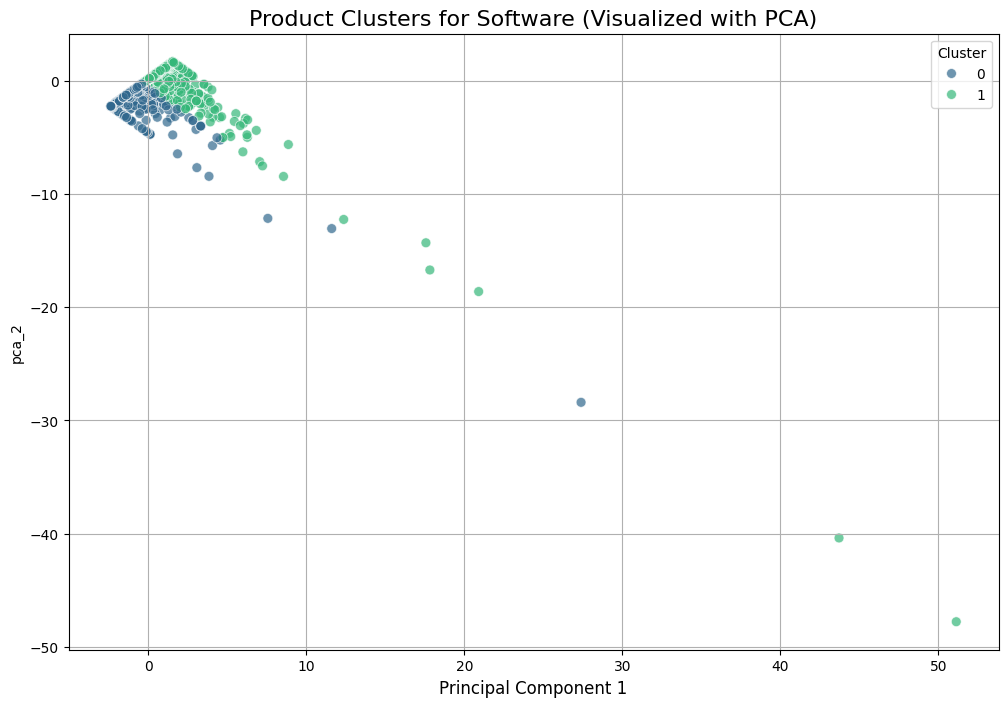


Null counts in raw data for relevant columns:
description          0
average_rating       0
price             8063
dtype: int64
Length before description processing: 11937
Length after description processing: 10120


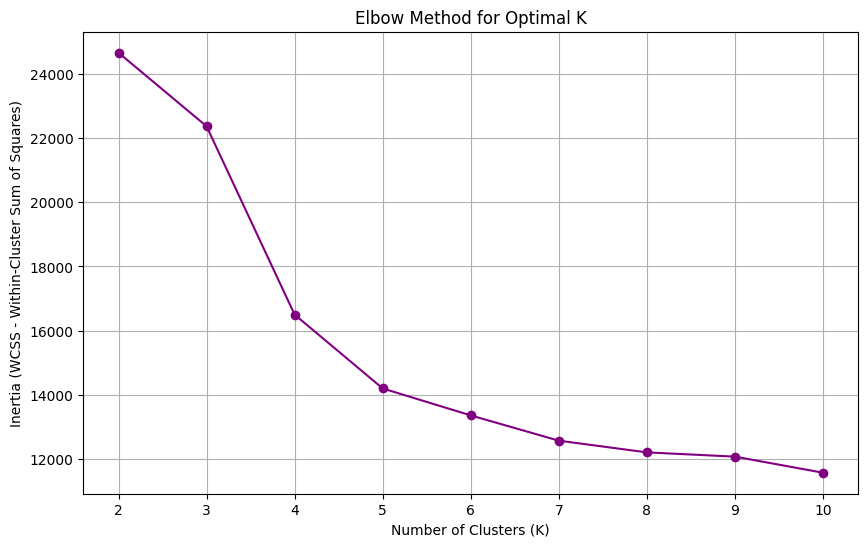

For n_clusters = 2, the average silhouette_score is: 0.8694


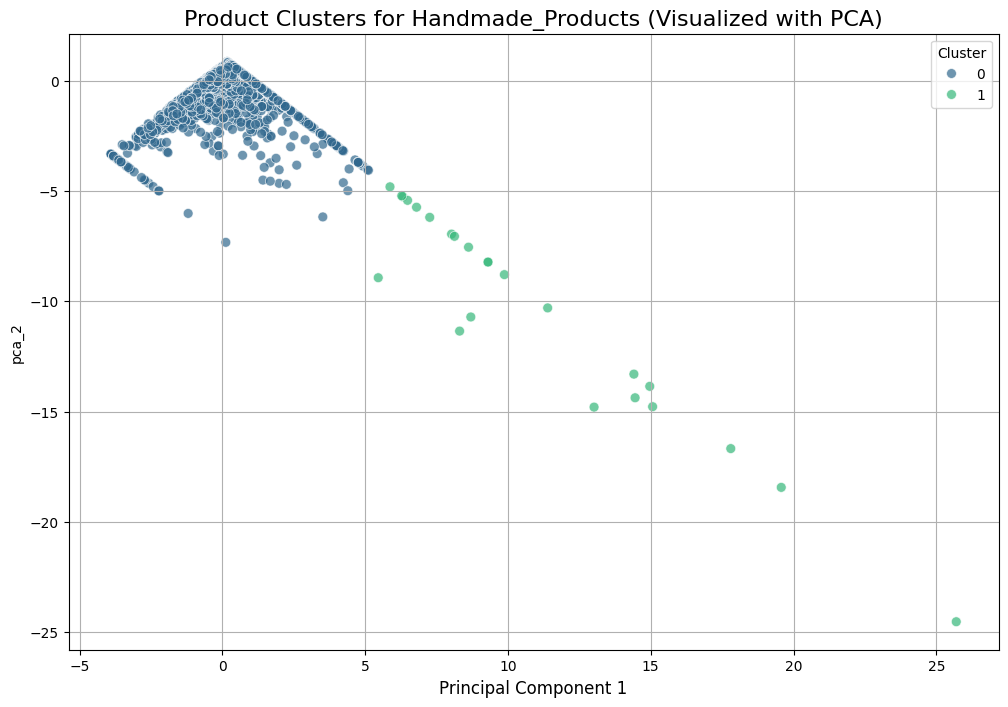


Null counts in raw data for relevant columns:
description           0
average_rating        0
price             10045
dtype: int64
Length before description processing: 9955
Length after description processing: 6881


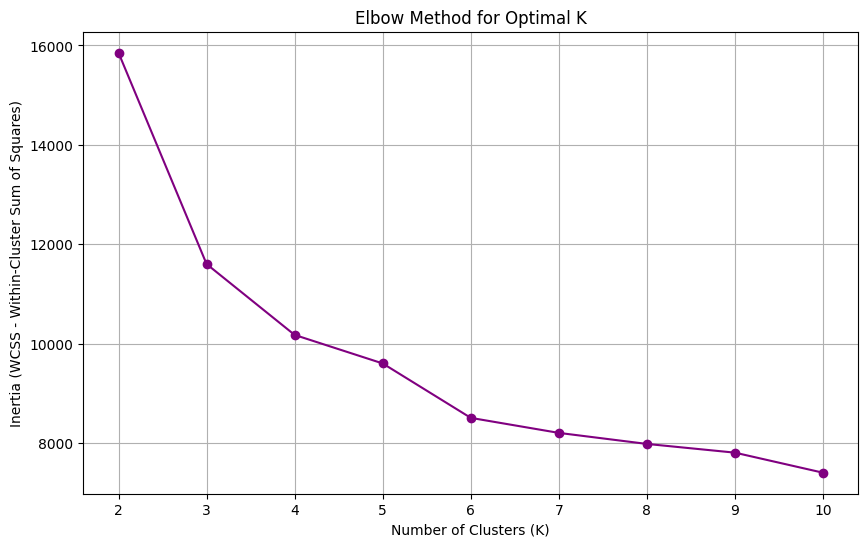

For n_clusters = 2, the average silhouette_score is: 0.4740


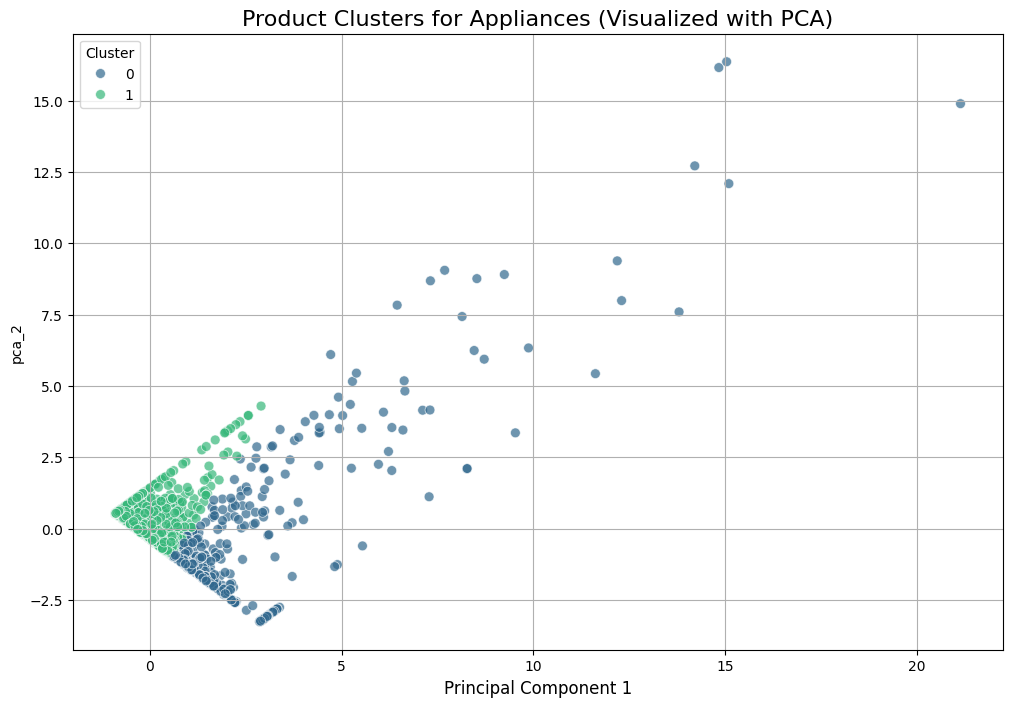


Null counts in raw data for relevant columns:
description          0
average_rating       0
price             8664
dtype: int64
Length before description processing: 11336
Length after description processing: 4825


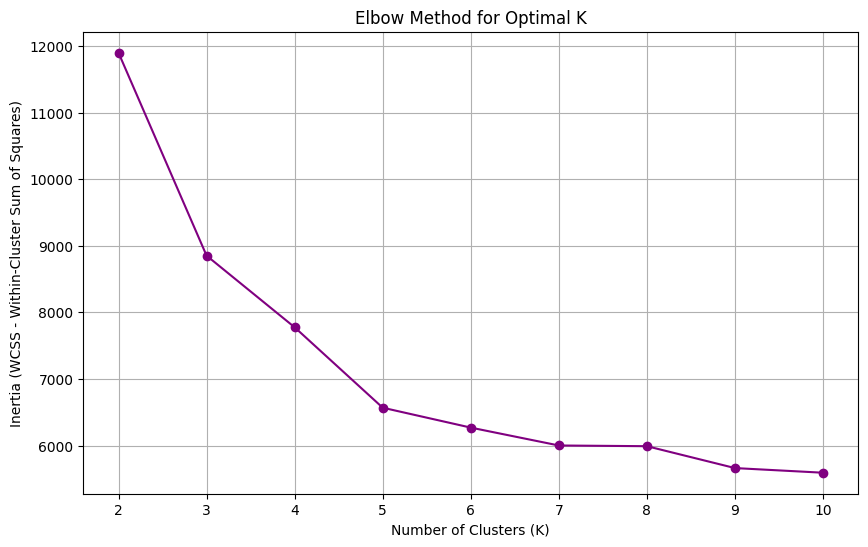

For n_clusters = 2, the average silhouette_score is: 0.5588


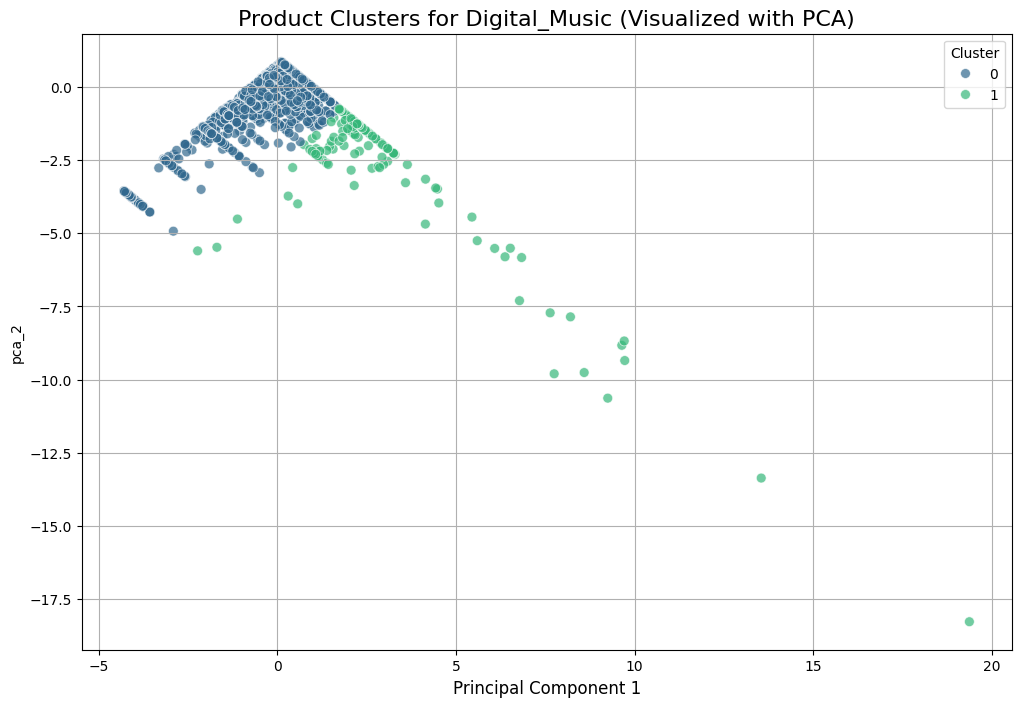

In [ ]:
#deprecated function to find best k by elbow method, kept best parameters below
# def find_best_k_by_elbow(k_values, inertia_values):
#     knee = KneeLocator(
#         k_values,
#         inertia_values,
#         curve='convex',
#         direction='decreasing'
#     )
#     return knee.knee #returns optimal k.


#parameters we ended up using after some experimentation
ideal_mfs=[1000,1000,10000,1000,1000]
ideal_ks=[4,2,2,2,2]

for cat,ideal_k,ideal_mf in zip(categories,ideal_ks,ideal_mfs):

    # we retrieve all columns but we later only keep the ones that matter
    whole_ds = read_csv(f"{cat}_meta.csv")
    # take a sample of 20.000 entries for faster processing
    whole_ds = whole_ds.sample(n=20000, random_state=42).copy()

    # keep only description, rating, price
    ds = whole_ds[['description', 'average_rating', 'price']].copy()

    # --- Check nulls in the columns of interest BEFORE selection and dropna ---
    print("\nNull counts in raw data for relevant columns:")
    print(ds.isnull().sum())

    # drop any entry that has null in description or average_rating
    ds = ds.dropna(subset=['description', 'average_rating', 'price']).copy()

    # REPLACE PRICE WITH MEAN instead of dropping the null values
    # mean_price = ds['price'].mean()
    # ds.loc[:, 'price'] = ds['price'].fillna(mean_price)

    print(f"Length before description processing: {len(ds)}")

    # clean description
    ds.loc[:, 'description'] = ds['description'].apply(preprocess_text)
    # drop also those that have nothing left after processing
    ds = ds[ds['description'].str.strip().astype(bool)].copy()
    print(f"Length after description processing: {len(ds)}")

    # initialize scaler and apply it
    scaler = StandardScaler()
    # apply scaler on both numerical columns
    scaled_numerical_features = scaler.fit_transform(ds[['price', 'average_rating']])
    # scaled_numerical_features = scaler.fit_transform(ds[['average_rating']])

    # some of the values for max_features we experimented with
    # mf_range = [1000, 2000, 5000, 7000, 10000, 15000, 20000]
    # for mf in mf_range:
    # print(f"for mf={ideal_mf}")
    # apply tf-idf to description column to get scaled results for words
    tfidf_vectorizer = TfidfVectorizer(
        max_features=ideal_mf,
        stop_words=None,  # no need, we already preprocess it in function
        norm='l2',
        min_df=5,  # must appear on at least n documents
        max_df=0.5,  # discard anything that appears over the specified percentage in all documents - avoid other common words
        ngram_range=(1, 2)  # try some n-grams
    )
    tfidf_features = tfidf_vectorizer.fit_transform(ds['description'])

    # combine scaled price and rating with tf-idf features with hstack for efficiency
    combined_features = hstack((tfidf_features, scaled_numerical_features))

    # implement clustering with k-means algorithm
    k_range = range(2, 11)
    inertia_values = []  # List to store inertia for each k
    for k in k_range:
        # initialize KMeans for the current K, random_state for reproducibility
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(combined_features)
        # append the inertia (WCSS) to our list
        inertia_values.append(kmeans.inertia_)

    # plot the Elbow Curve to determine optimal k, already done and recorded
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia_values, marker='o', color="purple", linestyle='-')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia (WCSS - Within-Cluster Sum of Squares)')
    plt.xticks(k_range)  # Ensure all tested K values are shown on the x-axis
    plt.grid(True)
    plt.show()

    # calculate silhouette score for each ideal_k
    # for k in k_range:
    final_kmeans = KMeans(n_clusters=ideal_k, random_state=42, n_init="auto")
    cluster_labels = final_kmeans.fit_predict(combined_features)
    ds['cluster'] = cluster_labels
    silhouette_avg = silhouette_score(combined_features, cluster_labels)
    print(f"For n_clusters = {ideal_k}, the average silhouette_score is: {silhouette_avg:.4f}")

   

    # PCA visualization (commented out)
    pca = PCA(n_components=2, random_state=42)
    features_2d = pca.fit_transform(combined_features.toarray())
    df_plot = pd.DataFrame({
        'pca_1': features_2d[:, 0],
        'pca_2': features_2d[:, 1],
        'cluster': cluster_labels
    })
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=df_plot,
        x='pca_1',
        y='pca_2',
        hue='cluster',
        palette='viridis',
        s=50,
        alpha=0.7
    )
    plt.title(f'Product Clusters for {cat} (Visualized with PCA)', fontsize=16)
    plt.xlabel('Principal Component 1', fontsize=12)
            # plt.ylabel('Principal Component 2', fontsize=12)
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()
    
   

    del whole_ds
    del ds
    gc.collect()


## Task 2

#### CF


##### data preparation

In [8]:
df= read_csv("Software_meta.csv")
rev_df=read_csv("Software_reviews.csv")

# print(df.dtypes,rev_df.dtypes)

#keep relevant columns for CF
cf_df = rev_df[['parent_asin', 'user_id', 'rating']].copy()

# #!!! TRYING TO MAKE THE ARRAY FOR ALL USERS CAUSE THE FOLLOWING MESSAGE:
# #PerformanceWarning: The following operation may generate 87450473343 cells in the resulting pandas object.
# #instead, i made a recommendation for 7k users who have rated more than x products and 15k products with more than y reviews
MIN_USER_REVIEWS = 5
MIN_ITEM_REVIEWS = 0

user_counts = cf_df['user_id'].value_counts()
active_users = user_counts[user_counts > MIN_USER_REVIEWS]
active_user_ids = active_users.index.tolist()
print(f"found {len(active_user_ids)} users with more than {MIN_USER_REVIEWS} reviews.")

#reproducibly sample 7k users
sampled_user_ids = pd.Series(active_user_ids).sample(n=7000, random_state=42).tolist()
cf_df_sample = cf_df[cf_df['user_id'].isin(sampled_user_ids)]

#only keep top 15k products that have at least ONE review
product_counts = cf_df_sample['parent_asin'].value_counts()
popular_products = product_counts[product_counts > MIN_ITEM_REVIEWS] 
popular_product_ids = popular_products.index.tolist()
print(f"found {len(popular_product_ids)} products with more than {MIN_ITEM_REVIEWS} reviews.")
#reproducibly sample 15k products
sampled_product_ids = pd.Series(popular_product_ids).sample(n=15000, random_state=42).tolist()
cf_df_sample = cf_df_sample[cf_df_sample['parent_asin'].isin(sampled_product_ids)]


#split the ds for evaluation
train_df, test_df = train_test_split(
    cf_df_sample,
    test_size=0.2,       #80% for training, 20% for testing
    random_state=42      #for reproducibility
)

#create the user-item matrix, fill any pairs not found with 0
user_item_matrix_train = train_df.pivot_table(
    index='user_id',
    columns='parent_asin',
    values='rating',
    fill_value=0
)

# print("\nUser-item matrix created successfully.")
print(f"Matrix shape: {user_item_matrix_train.shape}")
# print("Preview of the user-item matrix:")
# print(user_item_matrix.head())


found 22972 users with more than 5 reviews.
found 15816 products with more than 0 reviews.
Matrix shape: (6999, 13221)


##### user-based/item-based implementation and evaluation

In [ ]:
# ========================== CF FUNCTIONS =========================================

############## user based

# function to calculate user-item rating prediction (user-based CF)
# k: how many users to consider as similar
def predict_user_based(user_id, item_id, user_item_matrix, user_similarity_df, k=25):
    # get ratings for the target item from all users
    item_ratings = user_item_matrix[item_id]

    # find other users who have rated this item (rating > 0)
    users_who_rated = item_ratings[item_ratings > 0].index

    # get the similarity scores for the target user, but only for the users found above
    similarities = user_similarity_df.loc[user_id, users_who_rated]
    
    # remove the target user themselves from this list
    similarities = similarities.drop(user_id, errors='ignore')  # 'ignore' prevents error if user isn't in the list

    # if no other similar users have rated this item, we can't make a prediction
    if similarities.empty:
        return 0

    # sort by similarity and get the top K
    top_k_similarities = similarities.sort_values(ascending=False).head(k)
    top_k_users = top_k_similarities.index

    # get the ratings of these top K users for the target item
    top_k_ratings = item_ratings.loc[top_k_users]

    # calculate the weighted average
    weighted_sum = (top_k_similarities * top_k_ratings).sum()
    sum_of_weights = top_k_similarities.sum()

    # avoid division by zero
    if sum_of_weights == 0:
        return 0

    predicted_rating = weighted_sum / sum_of_weights
    return predicted_rating

# returns top-N recommendations for a user using the user-based prediction logic
def recommend_user_based(user_id, user_item_matrix, user_similarity_df, num_recommendations=5):
    # find items the user has NOT rated
    user_ratings = user_item_matrix.loc[user_id]
    unrated_items = user_ratings[user_ratings == 0].index

    # predict ratings for all unrated items
    predictions = {}
    for item_id in unrated_items:
        # use the prediction function
        predicted_rating = predict_user_based(user_id, item_id, user_item_matrix, user_similarity_df)
        if predicted_rating > 0:
            predictions[item_id] = predicted_rating

    # sort the predictions by score
    sorted_predictions = sorted(predictions.items(), key=lambda item: item[1], reverse=True)

    # return the top N recommendations
    return sorted_predictions[:num_recommendations]

############## item based

# function to calculate user-item rating prediction (item-based CF)
# k: how many items to consider as similar
def predict_item_based(user_id, item_id, user_item_matrix, item_similarity_df, k=25):
    # get all items rated by the user
    user_ratings = user_item_matrix.loc[user_id]
    rated_items = user_ratings[user_ratings > 0].index

    # get similarities between the target item and items rated by the user
    similarities = item_similarity_df.loc[item_id, rated_items]

    # remove the target item itself if present
    similarities = similarities.drop(item_id, errors='ignore')

    # if no similar items have been rated by the user, we can't make a prediction
    if similarities.empty:
        return 0

    # get top-K similar items
    top_k_similarities = similarities.sort_values(ascending=False).head(k)
    top_k_items = top_k_similarities.index

    # get the user's ratings for these items
    top_k_ratings = user_ratings.loc[top_k_items]

    # calculate the weighted average
    weighted_sum = (top_k_similarities * top_k_ratings).sum()
    sum_of_weights = top_k_similarities.sum()

    # avoid division by zero
    if sum_of_weights == 0:
        return 0

    predicted_rating = weighted_sum / sum_of_weights
    return predicted_rating

# returns top-N recommendations for a user using the item-based prediction logic
def recommend_item_based(user_id, user_item_matrix, item_similarity_df, num_recommendations=5):
    # find items the user has NOT rated
    user_ratings = user_item_matrix.loc[user_id]
    unrated_items = user_ratings[user_ratings == 0].index

    # predict ratings for all unrated items
    predictions = {}
    for item_id in unrated_items:
        predicted_rating = predict_item_based(user_id, item_id, user_item_matrix, item_similarity_df)
        if predicted_rating > 0:
            predictions[item_id] = predicted_rating

    # sort the predictions by score
    sorted_predictions = sorted(predictions.items(), key=lambda item: item[1], reverse=True)

    # return the top N recommendations
    return sorted_predictions[:num_recommendations]


#evaluates a CF model on the test set and returns the RMSE.
#model_type can be 'user_based' or 'item_based'.
def evaluate_model(model_type, test_df, train_matrix, user_sim_matrix, item_sim_matrix):
    true_ratings = []
    predicted_ratings = []

    print(f"\n--- Evaluating {model_type} model ---")
    
    #much faster to iterate over tuples than DataFrame rows
    for _, row in test_df.iterrows():
        user_id = row['user_id']
        item_id = row['parent_asin']
        true_rating = row['rating']
        
        # Check if the user and item exist in the training matrix.
        # This handles the "cold start" problem for the test set.
        if user_id not in train_matrix.index or item_id not in train_matrix.columns:
            continue

        if model_type == 'user_based':
            # Use the corrected prediction function from before
            predicted_rating = predict_user_based(user_id, item_id, train_matrix, user_sim_matrix)
        elif model_type == 'item_based':
            # Use the revised prediction function from before
            predicted_rating = predict_item_based(user_id, item_id, train_matrix, item_sim_matrix)
        else:
            raise ValueError("Invalid model type specified.")

        if predicted_rating > 0: # Only evaluate on successful predictions
            true_ratings.append(true_rating)
            predicted_ratings.append(predicted_rating)

    if not true_ratings:
        print("Could not make any predictions on the test set.")
        return None
        
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))
    return rmse


#========================== CF =========================================

#user-based model training ---
print("--- Training User-Based CF Model ---")
user_similarity_train = cosine_similarity(user_item_matrix_train)
# Create the DataFrame for user similarity
user_similarity_df_train = pd.DataFrame(
    user_similarity_train,
    index=user_item_matrix_train.index,
    columns=user_item_matrix_train.index
)

# --- Evaluate User-Based CF ---
# Pass the DATAFRAME to the evaluation function, not the NumPy array.
user_based_rmse = evaluate_model(
    model_type='user_based',
    test_df=test_df,
    train_matrix=user_item_matrix_train,
    user_sim_matrix=user_similarity_df_train, 
    item_sim_matrix=None
)
if user_based_rmse:
    print(f"\n>>> Final User-Based CF RMSE: {user_based_rmse:.4f}")

#keeps crashing with all that in memory
del user_similarity_train
del user_similarity_df_train
gc.collect()

#item-based model training ---
print("\n--- Training Item-Based CF Model ---")
# Transpose the matrix
item_user_matrix_train = user_item_matrix_train.T
# Calculate similarity on the TRAINING matrix
item_similarity_train = cosine_similarity(item_user_matrix_train)
# Create the DataFrame for item similarity
item_similarity_df_train = pd.DataFrame(
    item_similarity_train,
    index=item_user_matrix_train.index,
    columns=item_user_matrix_train.index
)

# --- Evaluate Item-Based CF ---
# Pass the DATAFRAME to the evaluation function.
item_based_rmse = evaluate_model(
    model_type='item_based',
    test_df=test_df,
    train_matrix=user_item_matrix_train,
    user_sim_matrix=None,
    item_sim_matrix=item_similarity_df_train
)
if item_based_rmse:
    print(f"\n>>> Final Item-Based CF RMSE: {item_based_rmse:.4f}")

del item_user_matrix_train
del item_similarity_train
del item_similarity_df_train
gc.collect()



--- Training User-Based CF Model ---

--- Evaluating user_based model ---

>>> Final User-Based CF RMSE: 1.5627

--- Training Item-Based CF Model ---

--- Evaluating item_based model ---

>>> Final Item-Based CF RMSE: 1.4380


0

#### CBF

##### data preparation

In [10]:
df= read_csv("Software_meta.csv")
rev_df=read_csv("Software_reviews.csv")

print(df.dtypes,rev_df.dtypes)

main_category       object
title               object
average_rating     float64
rating_number      float64
features            object
description         object
price              float64
store               object
categories          object
details             object
parent_asin         object
bought_together    float64
subtitle           float64
dtype: object rating               float64
title                 object
text                  object
images                object
asin                  object
parent_asin           object
user_id               object
timestamp              int64
helpful_vote           int64
verified_purchase       bool
dtype: object


## Task 3

#### start preprocessing text,extract features with 2 methods and train the 3 models

In [ ]:
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
def convert_rating_to_label(rating):
    # Convert to 0-100 scale for cleaner integer comparisons
    rating_int = int(rating * 100)
    if rating_int >= 70:
        return "positive"
    elif rating_int <= 30:
        return "negative"
    else:
        return "neutral"


def document_to_vector(text, model, num_features):
    words = text.split()
    #initialize a zero vector for the document.
    feature_vec = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in words:
        if word in model:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    #avoid division by zero if no words from the document were found in the model
    if n_words > 0:
        feature_vec = np.divide(feature_vec, n_words)

    return feature_vec
for cat in categories:
    whole_df=pd.read_csv(f"ds/{cat}_reviews.csv",nrows=50000)
    sent_df=pd.read_csv(f"ds/{cat}_sentiment_score.csv")

    #only keep first 50k rows with relevant fields
    df = whole_df[['text', 'rating']].copy()
    df['label'] = sent_df['final_sentiment_score'].apply(convert_rating_to_label)

    #print how many have null rating, just to check
    print("Null columns:",df.isnull().sum())
    #drop any entries with empty fields
    df.dropna(inplace=True)

    #apply preprocessing to text
    df['text'] = df['text'].apply(preprocess_text)

    #split ds to train and test
    X=df['text']
    Y=df['label']#better to use a numerically encoded version instead of strings
    Y_encoded = label_encoder.fit_transform(Y)
    X_train_text, X_test_text, Y_train, Y_test = train_test_split(
        X,
        Y_encoded,
        test_size=0.2,
        random_state=42,
        stratify=Y_encoded
    )

    #declare 10-fold
    k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    #define metrics we're interested in
    scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

    #list to present final results
    cross_table=[]

    #gather all results to present them for the second table
    second_table=[]

    #=============================== TF-IDF ====================================

    tfidf_vectorizer = TfidfVectorizer(
        max_features=5000,
        ngram_range=(1, 2)
    )

    #fit the vectorizer ONLY on the training data
    tfidf_vectorizer.fit(X_train_text)

    #apply that to both sets
    X_train_tfidf = tfidf_vectorizer.transform(X_train_text)
    X_test_tfidf = tfidf_vectorizer.transform(X_test_text)


    # Naive Bayes
    nb_model = MultinomialNB()
    nb_model.fit(X_train_tfidf, Y_train)
    y_pred_nb_tfidf = nb_model.predict(X_test_tfidf)
    #print(classification_report(Y_test, y_pred_nb_tfidf, target_names=label_encoder.classes_,zero_division=0))
    result=cross_validate(nb_model, X_train_tfidf, Y_train, cv=k_fold, scoring=scoring_metrics)

    #store the average results in a list
    cross_table.append(
        {
            'Feature Set': 'TF-IDF',
            'Model': 'Naive Bayes',
            'Accuracy': np.mean(result['test_accuracy']),
            'Precision': np.mean(result['test_precision_macro']),
            'Recall': np.mean(result['test_recall_macro']),
            'F1-Score': np.mean(result['test_f1_macro'])
        }
    )

    second_table.append(
        {
        'Feature Set': 'TF-IDF',
        'Model': 'Naive Bayes',
        'Accuracy': accuracy_score(Y_test, y_pred_nb_tfidf),
        'Precision': precision_score(Y_test, y_pred_nb_tfidf, average='macro', zero_division=0),
        'Recall': recall_score(Y_test, y_pred_nb_tfidf, average='macro', zero_division=0),
        'F1-Score': f1_score(Y_test, y_pred_nb_tfidf, average='macro', zero_division=0)
        }
    )


    # KNN
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train_tfidf, Y_train)
    y_pred_knn_tfidf = knn_model.predict(X_test_tfidf)
    #print(classification_report(Y_test, y_pred_knn_tfidf, target_names=label_encoder.classes_,zero_division=0))
    result=cross_validate(knn_model, X_train_tfidf, Y_train, cv=k_fold, scoring=scoring_metrics)
    cross_table.append(
        {
            'Feature Set': 'TF-IDF',
            'Model': 'KNN',
            'Accuracy': np.mean(result['test_accuracy']),
            'Precision': np.mean(result['test_precision_macro']),
            'Recall': np.mean(result['test_recall_macro']),
            'F1-Score': np.mean(result['test_f1_macro'])
        }
    )
    second_table.append({
        'Feature Set': 'TF-IDF',
        'Model': 'KNN',
        'Accuracy': accuracy_score(Y_test, y_pred_knn_tfidf),
        'Precision': precision_score(Y_test, y_pred_knn_tfidf, average='macro', zero_division=0),
        'Recall': recall_score(Y_test, y_pred_knn_tfidf, average='macro', zero_division=0),
        'F1-Score': f1_score(Y_test, y_pred_knn_tfidf, average='macro', zero_division=0)
    })

    # Random Forest                                                       #uses all cores to run faster
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1 )
    rf_model.fit(X_train_tfidf, Y_train)
    y_pred_rf_tfidf = rf_model.predict(X_test_tfidf)
    #print(classification_report(Y_test, y_pred_rf_tfidf, target_names=label_encoder.classes_,zero_division=0))
    result=cross_validate(rf_model, X_train_tfidf, Y_train, cv=k_fold, scoring=scoring_metrics)
    cross_table.append(
        {
            'Feature Set': 'TF-IDF',
            'Model': 'Random Forest',
            'Accuracy': np.mean(result['test_accuracy']),
            'Precision': np.mean(result['test_precision_macro']),
            'Recall': np.mean(result['test_recall_macro']),
            'F1-Score': np.mean(result['test_f1_macro'])
        }
    )
    second_table.append({
        'Feature Set': 'TF-IDF',
        'Model': 'Random Forest',
        'Accuracy': accuracy_score(Y_test, y_pred_rf_tfidf),
        'Precision': precision_score(Y_test, y_pred_rf_tfidf, average='macro', zero_division=0),
        'Recall': recall_score(Y_test, y_pred_rf_tfidf, average='macro', zero_division=0),
        'F1-Score': f1_score(Y_test, y_pred_rf_tfidf, average='macro', zero_division=0)
    })


    #=============================== Embeddings ====================================


    #load embedding model
    #option1: word2vec
    # model_name = 'word2vec-google-news-300'
    #option 2:fasttext,often a good choice due to OOV handling
    model_name = 'fasttext-wiki-news-subwords-300'

    embedding_model = api.load(model_name)
    embedding_dim = embedding_model.vector_size



    # apply the embedding to the sets
    X_train_embeddings = np.array([document_to_vector(doc, embedding_model, embedding_dim) for doc in X_train_text])
    X_test_embeddings = np.array([document_to_vector(doc, embedding_model, embedding_dim) for doc in X_test_text])


    #(Gaussian) Naive Bayes
    gnb_model = GaussianNB()
    gnb_model.fit(X_train_embeddings, Y_train)
    y_pred_gnb = gnb_model.predict(X_test_embeddings)
    #print(classification_report(Y_test, y_pred_gnb, target_names=label_encoder.classes_,zero_division=0))
    result=cross_validate(gnb_model, X_train_embeddings, Y_train, cv=k_fold, scoring=scoring_metrics)
    cross_table.append(
        {
            'Feature Set': 'Word Embeddings',
            'Model': 'Naive Bayes',
            'Accuracy': np.mean(result['test_accuracy']),
            'Precision': np.mean(result['test_precision_macro']),
            'Recall': np.mean(result['test_recall_macro']),
            'F1-Score': np.mean(result['test_f1_macro'])
        }
    )
    second_table.append({
        'Feature Set': 'Word Embeddings',
        'Model': 'Naive Bayes',
        'Accuracy': accuracy_score(Y_test, y_pred_gnb),
        'Precision': precision_score(Y_test, y_pred_gnb, average='macro', zero_division=0),
        'Recall': recall_score(Y_test, y_pred_gnb, average='macro', zero_division=0),
        'F1-Score': f1_score(Y_test, y_pred_gnb, average='macro', zero_division=0)
    })

    # KNN
    knn_model_emb = KNeighborsClassifier(n_neighbors=5)
    knn_model_emb.fit(X_train_embeddings, Y_train)
    y_pred_knn_emb = knn_model_emb.predict(X_test_embeddings)
    #print(classification_report(Y_test, y_pred_knn_emb, target_names=label_encoder.classes_,zero_division=0))
    result=cross_validate(knn_model_emb, X_train_embeddings, Y_train, cv=k_fold, scoring=scoring_metrics)
    cross_table.append(
        {
            'Feature Set': 'Word Embeddings',
            'Model': 'KNN',
            'Accuracy': np.mean(result['test_accuracy']),
            'Precision': np.mean(result['test_precision_macro']),
            'Recall': np.mean(result['test_recall_macro']),
            'F1-Score': np.mean(result['test_f1_macro'])
        }
    )
    second_table.append({
        'Feature Set': 'Word Embeddings',
        'Model': 'KNN',
        'Accuracy': accuracy_score(Y_test, y_pred_knn_emb),
        'Precision': precision_score(Y_test, y_pred_knn_emb, average='macro', zero_division=0),
        'Recall': recall_score(Y_test, y_pred_knn_emb, average='macro', zero_division=0),
        'F1-Score': f1_score(Y_test, y_pred_knn_emb, average='macro', zero_division=0)
    })

    # Random Forest
    rf_model_emb = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1)
    rf_model_emb.fit(X_train_embeddings, Y_train)
    y_pred_rf_emb = rf_model_emb.predict(X_test_embeddings)
    #print(classification_report(Y_test, y_pred_rf_emb, target_names=label_encoder.classes_,zero_division=0))
    result=cross_validate(rf_model_emb, X_train_embeddings, Y_train, cv=k_fold, scoring=scoring_metrics)
    cross_table.append(
        {
            'Feature Set': 'Word Embeddings',
            'Model': 'Random Forest',
            'Accuracy': np.mean(result['test_accuracy']),
            'Precision': np.mean(result['test_precision_macro']),
            'Recall': np.mean(result['test_recall_macro']),
            'F1-Score': np.mean(result['test_f1_macro'])
        }
    )
    second_table.append({
        'Feature Set': 'Word Embeddings',
        'Model': 'Random Forest',
        'Accuracy': accuracy_score(Y_test, y_pred_rf_emb),
        'Precision': precision_score(Y_test, y_pred_rf_emb, average='macro', zero_division=0),
        'Recall': recall_score(Y_test, y_pred_rf_emb, average='macro', zero_division=0),
        'F1-Score': f1_score(Y_test, y_pred_rf_emb, average='macro', zero_division=0)
    })

    #print results of 10-fold cross validation
    cross_table_df = pd.DataFrame(cross_table)
    #display the results table for the cross validation
    print(f"--- 10-Fold Cross Validation Performance for dataset:{cat} ---")
    display(cross_table_df.style.format({
        'Accuracy': '{:.4f}',
        'Precision': '{:.4f}',
        'Recall': '{:.4f}',
        'F1-Score': '{:.4f}'
    }))

    print("\n\n")


    #convert to dataframe
    second_table_df = pd.DataFrame(second_table)

    #display the results table for the test set
    print(f"--- Final Test Set Performance for dataset:{cat} ---")
    display(second_table_df.style.format({
        'Accuracy': '{:.4f}',
        'Precision': '{:.4f}',
        'Recall': '{:.4f}',
        'F1-Score': '{:.4f}'
    }))


    #free df
    del whole_df
    del df
    del sent_df
    gc.collect()


Null columns: text      5
rating    0
label     0
dtype: int64
--- 10-Fold Cross Validation Performance for dataset:All_Beauty ---


,Feature Set,Model,Accuracy,Precision,Recall,F1-Score
0,TF-IDF,Naive Bayes,0.6937,0.2312,0.3333,0.2730
1,TF-IDF,KNN,0.5505,0.3321,0.3322,0.3310
2,TF-IDF,Random Forest,0.6828,0.3314,0.3334,0.2835
3,Word Embeddings,Naive Bayes,0.5722,0.3453,0.3400,0.3208
4,Word Embeddings,KNN,0.6081,0.3329,0.3327,0.3222
5,Word Embeddings,Random Forest,0.6906,0.3331,0.3336,0.2767





--- Final Test Set Performance for dataset:All_Beauty ---


,Feature Set,Model,Accuracy,Precision,Recall,F1-Score
0,TF-IDF,Naive Bayes,0.6937,0.2312,0.3333,0.2730
1,TF-IDF,KNN,0.5570,0.3399,0.3387,0.3383
2,TF-IDF,Random Forest,0.6822,0.3354,0.3338,0.2852
3,Word Embeddings,Naive Bayes,0.5653,0.3325,0.3318,0.3107
4,Word Embeddings,KNN,0.6044,0.3316,0.3327,0.3234
5,Word Embeddings,Random Forest,0.6914,0.3701,0.3346,0.2786


Null columns: text      16
rating     0
label      0
dtype: int64
--- 10-Fold Cross Validation Performance for dataset:Software ---


,Feature Set,Model,Accuracy,Precision,Recall,F1-Score
0,TF-IDF,Naive Bayes,0.7166,0.6539,0.5512,0.5586
1,TF-IDF,KNN,0.5596,0.4341,0.4112,0.4151
2,TF-IDF,Random Forest,0.7181,0.6471,0.5596,0.5616
3,Word Embeddings,Naive Bayes,0.4867,0.4937,0.5125,0.4666
4,Word Embeddings,KNN,0.6280,0.5219,0.5120,0.5161
5,Word Embeddings,Random Forest,0.6728,0.6037,0.4735,0.4700





--- Final Test Set Performance for dataset:Software ---


,Feature Set,Model,Accuracy,Precision,Recall,F1-Score
0,TF-IDF,Naive Bayes,0.7118,0.6466,0.5435,0.5511
1,TF-IDF,KNN,0.5630,0.4378,0.4151,0.4193
2,TF-IDF,Random Forest,0.7183,0.6571,0.5621,0.5672
3,Word Embeddings,Naive Bayes,0.4882,0.4938,0.5155,0.4699
4,Word Embeddings,KNN,0.6281,0.5183,0.5089,0.5126
5,Word Embeddings,Random Forest,0.6753,0.6221,0.4763,0.4748


Null columns: text      7
rating    0
label     0
dtype: int64
--- 10-Fold Cross Validation Performance for dataset:Handmade_Products ---


,Feature Set,Model,Accuracy,Precision,Recall,F1-Score
0,TF-IDF,Naive Bayes,0.8514,0.7207,0.4559,0.5011
1,TF-IDF,KNN,0.8247,0.5411,0.3782,0.3867
2,TF-IDF,Random Forest,0.8558,0.6824,0.4963,0.5345
3,Word Embeddings,Naive Bayes,0.6035,0.4884,0.5817,0.4709
4,Word Embeddings,KNN,0.8330,0.5840,0.4367,0.4672
5,Word Embeddings,Random Forest,0.8320,0.6621,0.3680,0.3684





--- Final Test Set Performance for dataset:Handmade_Products ---


,Feature Set,Model,Accuracy,Precision,Recall,F1-Score
0,TF-IDF,Naive Bayes,0.8528,0.7278,0.4588,0.5059
1,TF-IDF,KNN,0.8248,0.5280,0.3778,0.3860
2,TF-IDF,Random Forest,0.8580,0.6975,0.5057,0.5474
3,Word Embeddings,Naive Bayes,0.6051,0.4911,0.5808,0.4731
4,Word Embeddings,KNN,0.8359,0.6005,0.4477,0.4818
5,Word Embeddings,Random Forest,0.8349,0.6959,0.3754,0.3815


Null columns: text      6
rating    0
label     0
dtype: int64
--- 10-Fold Cross Validation Performance for dataset:Appliances ---


,Feature Set,Model,Accuracy,Precision,Recall,F1-Score
0,TF-IDF,Naive Bayes,0.7932,0.6746,0.4433,0.4639
1,TF-IDF,KNN,0.7411,0.4437,0.3558,0.3443
2,TF-IDF,Random Forest,0.7962,0.6352,0.4614,0.4731
3,Word Embeddings,Naive Bayes,0.4412,0.4567,0.4638,0.3762
4,Word Embeddings,KNN,0.7407,0.4854,0.4322,0.4460
5,Word Embeddings,Random Forest,0.7662,0.6326,0.3577,0.3358





--- Final Test Set Performance for dataset:Appliances ---


,Feature Set,Model,Accuracy,Precision,Recall,F1-Score
0,TF-IDF,Naive Bayes,0.7916,0.6613,0.4403,0.4602
1,TF-IDF,KNN,0.7395,0.4380,0.3589,0.3501
2,TF-IDF,Random Forest,0.7973,0.6302,0.4659,0.4775
3,Word Embeddings,Naive Bayes,0.4308,0.4512,0.4544,0.3670
4,Word Embeddings,KNN,0.7399,0.4838,0.4335,0.4471
5,Word Embeddings,Random Forest,0.7662,0.6369,0.3562,0.3330


Null columns: text      2
rating    0
label     0
dtype: int64
--- 10-Fold Cross Validation Performance for dataset:Digital_Music ---


,Feature Set,Model,Accuracy,Precision,Recall,F1-Score
0,TF-IDF,Naive Bayes,0.8512,0.7255,0.3696,0.3766
1,TF-IDF,KNN,0.8436,0.4898,0.3613,0.3594
2,TF-IDF,Random Forest,0.8590,0.6876,0.4192,0.4468
3,Word Embeddings,Naive Bayes,0.3971,0.4182,0.4771,0.3248
4,Word Embeddings,KNN,0.8361,0.5286,0.4055,0.4276
5,Word Embeddings,Random Forest,0.8497,0.6879,0.3463,0.3319





--- Final Test Set Performance for dataset:Digital_Music ---


,Feature Set,Model,Accuracy,Precision,Recall,F1-Score
0,TF-IDF,Naive Bayes,0.8516,0.7304,0.3692,0.3758
1,TF-IDF,KNN,0.8430,0.4841,0.3624,0.3612
2,TF-IDF,Random Forest,0.8594,0.6921,0.4266,0.4578
3,Word Embeddings,Naive Bayes,0.3942,0.4123,0.4692,0.3170
4,Word Embeddings,KNN,0.8323,0.4950,0.3946,0.4107
5,Word Embeddings,Random Forest,0.8495,0.6493,0.3440,0.3275
